<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/Optuna_VAE_2_26_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Instalation 
---

In [58]:
# !pip install captum
# !pip install umap-learn
# !pip install datashader
# !pip install bokeh
# !pip install holoviews
!pip install tensorboardX
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.2 MB/s eta 0:00:00


---
VAE Initializaiton, Visualization and Training
--- 

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

# from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
# from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

import matplotlib.pyplot as plt
import seaborn as sns    
# import plotly.offline as py
# import plotly.graph_objs as go        
                
# from tqdm import tqdm

# import umap
# import umap.plot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#based on sensor data can you determine the stimulus that is currently in use?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

In [ ]:
#df = df.drop(columns=['series_id'])
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
type(df)
#df.describe()
#df.plot()

pandas.core.frame.DataFrame

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()
#print(y.value_counts())

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>



In [ ]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
y.head()

,stimulus
0,0
1,0
2,0
3,0
4,0


---
Visulaize number of lables

0     49599
8      6795
5      6782
6      6776
7      6776
11     6773
1      6753
12     6701
10     6696
2      6656
4      6654
9      6626
3      6613
Name: stimulus, dtype: int64

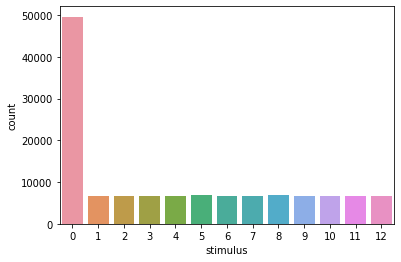

In [ ]:
sns.countplot(x = 'stimulus', data=df)
df.loc[:,'stimulus'].value_counts()

---
Visualize Data Disturbutions


In [ ]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()


In [ ]:
X = df.iloc[:,1:].values
y = df.iloc[:, 0:1].values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).float()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).float()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).float()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

(130200, 19) <class 'numpy.ndarray'> (130200, 1) <class 'numpy.ndarray'>

X_train size: 78120 | X_val size: 26040 | X_test size: 26040
y_train size: 78120 | y_val size: 26040 | y_test size: 26040

Training Feature Split: (78120, 19) | Training Labels (78120, 1)
Validation Feature Split: (26040, 19) | Validation Labels (26040, 1)
Testing Feature Split: (26040, 19) | Testing Labels (26040, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([78120, 19]) , torch.Size([78120, 1])
Validation: torch.Size([26040, 19]) , torch.Size([26040, 1])
Testing:  torch.Size([26040, 19]) , torch.Size([26040, 1])


In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 100
batch_size= 100
learning_rate= 0.0001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.001
alpha = 1

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


In [ ]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(x_reconstructed.shape)
  print(mu.shape)
  print(logvar.shape)
  print(z_reparmeterized.shape)
  print(classified.shape)


torch.Size([100, 19])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 13])


In [ ]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

def accuracy(y_pred, y_act):
  y_pred = torch.round(y_pred)
  correct = (y_pred == y_act)
  acc1 = correct.sum()/len(correct)
  acc2 = torch.round(acc1*100)
  # print(f"z_pred: {y_pred} | lable: {y_act} | correct: {correct} | accuracy {acc1} | accuracy {acc2}")
  return acc2

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): Linear(in_features=9, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=9, bias=True)
  (fc4): Linear(in_features=9, out_features=19, bias=True)
  (classifier): Sequential(
    (0): Linear(in_features=2, out_features=13, bias=True)
    (1): Sigmoid()
    (2): Softmax(dim=1)
  )
)


In [ ]:
train_losses=[]
val_losses=[]
train_accuracy = []
val_accuracy = []


dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  #print(f"zvalue loop begin {z}")
  train_running_loss = 0
  train_running_acc = 0
#  loop = tqdm(train_loader)
  for i, data in enumerate(train_loader):
    inputs, labels = data
    #print(f'type data: {type(data)}')
    #print(f'type inputs: {type(inputs)}')
    #print(f'type labels: {type(labels)}')

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)
    #print(x_reconstructed, type(x_reconstructed))
    #print(mu, type(mu))
    #print(logvar, type(logvar))

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss = alpha*reconstruction_loss + kld_loss*beta

    acc_train = accuracy(classified, labels)
    #print(reconstruction_loss, kld_loss, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

    train_running_acc += acc_train.item()
    train_acc = train_running_acc/len(train_loader)

  
  z_list, means, logvars , labels = list(), list(), list(), list()

  #Evaluation
  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      #print(labels)
      #inputs = torch.autograd.Variable(inputs)
      y_pred, z_reparmeterized, classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      vloss = alpha*v_reconstruction_loss + v_kld_loss*beta
      #print(v_reconstruction_loss, v_kld_loss, vloss)

      # yhat = torch.max(z.data,1)
      # correct+=(yhat==y_test).sum().int()
      # accuracy = correct / n_test
      # accuracy_list.append(accuracy)
  

      # val_acc = accuracy(classified, labels)
      val_acc = 0

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      # log ...
      z_list.append(z_reparmeterized.detach())
      means.append(mu.detach())
      logvars.append(logvar.detach())
      labels.append(Y.detach())

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels))

  print(f"Epoch: {epoch+1}/{num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | total loss: {train_loss:.3f} | train acc: {train_acc:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracy.append(train_acc)
  



Epoch: 1 / 200 | reconst_loss: 3.104 | kldiv loss: 8.09943 | total loss: 24.054 | train acc: 495.662 ||| Val Loss: 16.296 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 200 | reconst_loss: 1.574 | kldiv loss: 24.58802 | total loss: 12.769 | train acc: 495.662 ||| Val Loss: 10.124 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 200 | reconst_loss: 0.801 | kldiv loss: 45.93206 | total loss: 8.234 | train acc: 495.463 ||| Val Loss: 6.572 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 4 / 200 | reconst_loss: 0.830 | kldiv loss: 72.12294 | total loss: 5.349 | train acc: 495.529 ||| Val Loss: 4.502 | val acc: 0.000
----------------------------------------------------------------------------------------------------

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

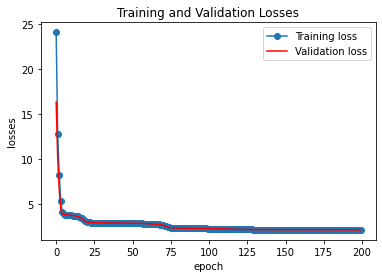

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

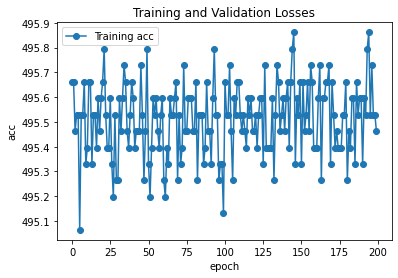

In [ ]:
plt.plot(train_accuracy,'-o', label="Training acc")
# plt.plot(val_acc,'-r',  label="Validation acc")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(10,10))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('hsv', 13))
  cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],values=[0,1,2,3,4,5,6,7,8,9,10,11,12])

  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  
  cb.ax.tick_params(labelsize=10)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with latent space Dim=2  Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave("/content/result.gif",gif)

from IPython.display import Image

fname = '/content/result.gif'
Image(open(fname, 'rb').read())  # local

Latent Space Visualization
Latent Space Image 1 stored.
Latent Space Image 2 stored.
Latent Space Image 3 stored.
Latent Space Image 4 stored.
Latent Space Image 5 stored.
Latent Space Image 6 stored.
Latent Space Image 7 stored.
Latent Space Image 8 stored.
Latent Space Image 9 stored.
Latent Space Image 10 stored.
Latent Space Image 11 stored.
Latent Space Image 12 stored.
Latent Space Image 13 stored.
Latent Space Image 14 stored.
Latent Space Image 15 stored.
Latent Space Image 16 stored.
Latent Space Image 17 stored.
Latent Space Image 18 stored.
Latent Space Image 19 stored.
Latent Space Image 20 stored.
Latent Space Image 21 stored.
Latent Space Image 22 stored.
Latent Space Image 23 stored.
Latent Space Image 24 stored.
Latent Space Image 25 stored.
Latent Space Image 26 stored.
Latent Space Image 27 stored.
Latent Space Image 28 stored.
Latent Space Image 29 stored.
Latent Space Image 30 stored.
Latent Space Image 31 stored.
Latent Space Image 32 stored.
Latent Space Image 33 

In [ ]:
# for i in range (num_epochs):
#   z_arr = dic['latent_space'][i].cpu().numpy()
#   y_arr = dic['y'][i].cpu().numpy()
#   plt.figure(figsize = (10,5))
#   plt.subplot(1,2,1)
#   plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr)
#   plt.colorbar()
#   plt.tight_layout()

---
VAE Experiment 1 **[]** 2/26
---

In [634]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torchvision
from torchvision import datasets

#based on sensor data can you determine the stimulus that is currently in use?
import optuna

In [635]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/Subject_1/S1_E1_A1.csv")
#drops all 0 labels (no label)
indices_to_drop = df[df["stimulus"] == 0].index
df.drop(indices_to_drop, inplace=True)

#Removes number of features from data
# df.drop('Cyber Glove (angles of the joints) Sensor 1', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 2', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 3', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 4', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 5', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 6', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 7', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 8', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 9', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 10', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 11', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 12', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 13', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 14', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 15', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 16', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 17', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 18', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 19', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 20', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 21', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 22', inplace=True, axis=1)

In [636]:
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
767,1,-0.054199,0.74414,-0.67529,0,0,-2,-2,-1,1,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
768,1,-0.054199,0.74414,-0.67529,4,0,-2,-1,0,-1,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
769,1,-0.053853,0.74483,-0.67495,-2,-1,-1,1,-2,-2,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
770,1,-0.050781,0.75098,-0.67188,1,-1,-2,-1,-1,0,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
771,1,-0.050781,0.75098,-0.67188,-3,1,0,-2,-2,-1,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165


In [637]:
X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

(80601, 41) <class 'pandas.core.frame.DataFrame'> (80601, 1) <class 'pandas.core.frame.DataFrame'>



In [638]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
767,-0.054199,0.74414,-0.67529,0,0,-2,-2,-1,1,1,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
768,-0.054199,0.74414,-0.67529,4,0,-2,-1,0,-1,-2,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
769,-0.053853,0.74483,-0.67495,-2,-1,-1,1,-2,-2,0,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
770,-0.050781,0.75098,-0.67188,1,-1,-2,-1,-1,0,-2,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165
771,-0.050781,0.75098,-0.67188,-3,1,0,-2,-2,-1,-1,...,26.486,-25.345,6.3106,34.944,19.858,0.48,15.833,64.597,9.5294,10.165


---
Visualization number of labels

stimulus
8           6795
5           6782
6           6776
7           6776
11          6773
1           6753
12          6701
10          6696
2           6656
4           6654
9           6626
3           6613
dtype: int64

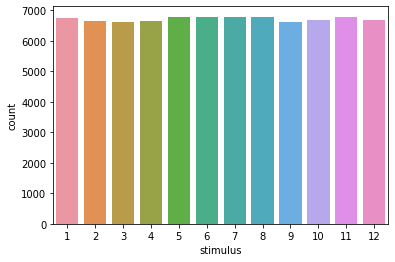

In [639]:
sns.countplot(x = 'stimulus', data=df)
y.value_counts()

---
Fixing Data Imbalance via Undersampling

<AxesSubplot:xlabel='stimulus'>

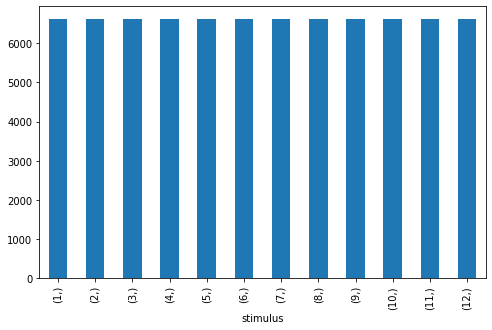

In [640]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot(kind='bar', figsize=(8,5))

In [641]:
print(y_res.value_counts())
print(len(X_res.value_counts()))

stimulus
1           6613
2           6613
3           6613
4           6613
5           6613
6           6613
7           6613
8           6613
9           6613
10          6613
11          6613
12          6613
dtype: int64
79356


In [642]:
print(y)

        stimulus
767            1
768            1
769            1
770            1
771            1
...          ...
130195        12
130196        12
130197        12
130198        12
130199        12

[80601 rows x 1 columns]


---
Visualization of Data Distributions

In [643]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()

---
Defining Hyperparmaeters

In [644]:
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
emg_channels = 16
imu_channels = 3

latent_dim = 2
input_dim= len(X.columns)

hidden_dim= round(input_dim/2)
hidden_dim_2 = round(input_dim/4)
output_dim = len(X.columns)
num_classes = 12
num_layers = round(num_classes/2)
tempature = 1

num_epochs= 10
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant
l2_lambda = 0


alpha = 2        # Reconstruction Loss
beta = 2         # Kl Divergence Loss
gamma = 3        # Classifcation Loss
delta = 5        # Contrastive Loss
epsilon = 3      # Triplet Loss

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

---
Train Test Split

In [645]:
X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

(79356, 41) <class 'numpy.ndarray'> (79356, 1) <class 'numpy.ndarray'>

X_train size: 47613 | X_val size: 15871 | X_test size: 15872
y_train size: 47613 | y_val size: 15871 | y_test size: 15872

Training Feature Split: (47613, 41) | Training Labels (47613, 1)
Validation Feature Split: (15871, 41) | Validation Labels (15871, 1)
Testing Feature Split: (15872, 41) | Testing Labels (15872, 1)



---
Scaling/Normalizing Data

In [646]:
#Normalization Data 

#No Normalization 
# X_train_Normalized = X_train
# X_val_Normalized = X_val
# X_test_Normalized = X_test
#----------------------------------------------------------------------------------------------------------
# Minmax without preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train)
# X_val_Normalized = Minmax.transform(X_val)
# X_test_Normalized = Minmax.transform(X_test)
#----------------------------------------------------------------------------------------------------------
# Minmax with preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train_preprocessed)
# X_val_Normalized = Minmax.transform(X_val_preprocessed)
# X_test_Normalized = Minmax.transform(X_test_preprocessed)

#----------------------------------------------------------------------------------------------------------
# # Standardization without preprocessing
Standardized = preprocessing.StandardScaler()
X_train_Normalized= Standardized.fit_transform(X_train)
X_val_Normalized = Standardized.transform(X_val)
X_test_Normalized = Standardized.transform(X_test)

# Standardization with preprocessing
# Standardized = preprocessing.StandardScaler()
# X_train_Normalized= Standardized.fit_transform(X_train_preprocessed)
# X_val_Normalized = Standardized.transform(X_val_preprocessed)
# X_test_Normalized = Standardized.transform(X_test_preprocessed)
#----------------------------------------------------------------------------------------------------------

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Normalized).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Normalized).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Normalized).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([47613, 41]) , torch.Size([47613, 1])
Validation: torch.Size([15871, 41]) , torch.Size([15871, 1])
Testing:  torch.Size([15872, 41]) , torch.Size([15872, 1])


---
Defining Dataloaders


In [647]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

In [648]:
training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)


train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)

def get_data_loader(optuna_batch_size):
  train_loader = DataLoader(training, batch_size=optuna_batch_size, shuffle=True)
  val_loader = DataLoader(validating, batch_size=optuna_batch_size, shuffle=False)
  test_loader = DataLoader(testing, batch_size=optuna_batch_size, shuffle=False)
  return train_loader, val_loader, test_loader

---
Defining VAE Model, Loss and Optmizers

In [649]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.encoder = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
    )
    self.mu = nn.Linear(hidden_dim_2, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim_2, latent_dim)   # log-var
    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, input_dim),
    )
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, num_layers),
        nn.ReLU(),
        nn.Linear(num_layers, 13),
        nn.Softmax(dim=1)
    )

  def encode(self, x):  
    z = self.encoder(x)
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):

    return self.decoder(x)

  def forward(self, x):
#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   

    x_reconstructed = self.decode(z_reparmeterized)
    classified = self.classifier(z_reparmeterized)
    classified = classified / tempature

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(f"Reconstruction X: {x_reconstructed.shape}")

  print(f"Mu: {mu.shape} ")
  
  print(f"Logvar: {logvar.shape}")
 
  print(f"Latent Space Z: {z_reparmeterized.shape}")
 
  print(f"Classifier: {classified.shape}")

Reconstruction X: torch.Size([100, 41])
Mu: torch.Size([100, 2]) 
Logvar: torch.Size([100, 2])
Latent Space Z: torch.Size([100, 2])
Classifier: torch.Size([100, 13])


In [650]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss

In [651]:
def train_VAE(model, train_loader, val_loader, optimizer, epoch,alpha,beta,gamma, delta):
  train_losses=[]
  train_accuracy = []
  accuracy_log = []
  val_losses=[]
  val_accuracy=[]

  train_running_loss = 0
  model.train()
  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

  
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + (delta*contrastive_loss)

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

  return train_losses, val_losses, train_acc, val_acc



In [652]:
def objective(trial):
  params = {
          'optuna_batch_size' : trial.suggest_int('optuna_batch_size', 1e1, 1e3),
          'num_epochs' : num_epochs,
          'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop"]),
          "lr": trial.suggest_float('lr', 1e-4, 1e-2),
          'alpha': trial.suggest_float('alpha', 1e-1, 1e1),
          'beta': trial.suggest_float('beta', 1e-1, 1e1), 
          'gamma': trial.suggest_float('gamma', 1e-1, 1e1), 
          'delta': trial.suggest_float('delta', 1e-1, 1e1),        
  }
  loss_fn = nn.MSELoss(reduction="sum")
  classifier_loss_fn = nn.CrossEntropyLoss()
  contrastive_loss_fn = ContrastiveLoss(margin=1)

  train_loader, val_loader, test_loader = get_data_loader(params['optuna_batch_size'])
  model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
  optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr=params['lr'])

  for epoch in range(params['num_epochs']):
    train_losses, val_losses, train_acc, val_acc = train_VAE(model, train_loader, val_loader, optimizer, epoch, alpha, beta, gamma, delta)
  return train_acc


In [653]:
sampler = optuna.samplers.TPESampler()    
study = optuna.create_study(
    sampler=sampler,
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=3, n_warmup_steps=5, interval_steps=3
    ),
    direction='maximize')
study.optimize(func=objective, n_trials=100)

[I 2023-02-27 02:13:55,111] A new study created in memory with name: no-name-b82e91a8-050c-47a5-86b9-a94f89cc5d1a


Epoch: 1 / 10 | Reconst_loss: 3624.191 | Kldiv loss: 651.929 | Classifcation loss: 2.193 | Constrast loss: 68.72 | Total loss: 51415.956 | Train acc: 37.617 % ||| Val Loss: 32055.905 | Val acc: 55.419 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4011.995 | Kldiv loss: 571.580 | Classifcation loss: 2.078 | Constrast loss: 42.65 | Total loss: 31291.195 | Train acc: 57.652 % ||| Val Loss: 29097.678 | Val acc: 66.616 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | Reconst_loss: 3329.486 | Kldiv loss: 641.114 | Classifcation loss: 2.008 | Constrast loss: 14.18 | Total loss: 28832.497 | Train acc: 66.216 % ||| Val Loss: 27036.422 | Val acc: 71.868 %
---------------------------

[I 2023-02-27 02:14:14,612] Trial 0 finished with value: 0.7904063339849383 and parameters: {'optuna_batch_size': 377, 'optimizer': 'RMSprop', 'lr': 0.00914583708232578, 'alpha': 0.3906756844718775, 'beta': 2.1954633190069917, 'gamma': 9.822760583924515, 'delta': 8.45568398785775}. Best is trial 0 with value: 0.7904063339849383.


Epoch: 10 / 10 | Reconst_loss: 2770.805 | Kldiv loss: 571.709 | Classifcation loss: 1.873 | Constrast loss: 8.12 | Total loss: 25159.880 | Train acc: 79.041 % ||| Val Loss: 24081.844 | Val acc: 81.392 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 12683.846 | Kldiv loss: 5382.068 | Classifcation loss: 2.358 | Constrast loss: 893.63 | Total loss: 392013.570 | Train acc: 20.893 % ||| Val Loss: 112574.751 | Val acc: 32.452 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 11014.005 | Kldiv loss: 4289.114 | Classifcation loss: 2.330 | Constrast loss: 560.52 | Total loss: 101540.023 | Train acc: 34.954 % ||| Val Loss: 95675.958 | Val acc: 38.679 %
------------------

[I 2023-02-27 02:14:36,729] Trial 1 finished with value: 0.5511261314382657 and parameters: {'optuna_batch_size': 844, 'optimizer': 'RMSprop', 'lr': 0.008994235813501767, 'alpha': 1.2677882459586656, 'beta': 2.361762595594783, 'gamma': 4.933311705615116, 'delta': 9.438713983599923}. Best is trial 0 with value: 0.7904063339849383.


Epoch: 10 / 10 | Reconst_loss: 9861.928 | Kldiv loss: 2557.279 | Classifcation loss: 2.143 | Constrast loss: 184.50 | Total loss: 66440.445 | Train acc: 55.113 % ||| Val Loss: 62429.307 | Val acc: 60.976 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 29769.467 | Kldiv loss: 10381.631 | Classifcation loss: 2.440 | Constrast loss: 4160.04 | Total loss: 379917.283 | Train acc: 21.197 % ||| Val Loss: 99230.411 | Val acc: 26.223 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 28525.463 | Kldiv loss: 7482.173 | Classifcation loss: 2.348 | Constrast loss: 2210.09 | Total loss: 89449.265 | Train acc: 31.881 % ||| Val Loss: 80527.765 | Val acc: 37.797 %
--------------

[I 2023-02-27 02:14:59,405] Trial 2 finished with value: 0.5647279394290547 and parameters: {'optuna_batch_size': 866, 'optimizer': 'RMSprop', 'lr': 0.0031914377103574873, 'alpha': 4.327079977852112, 'beta': 5.766099293225125, 'gamma': 2.3209832352162407, 'delta': 8.831169474070037}. Best is trial 0 with value: 0.7904063339849383.


Epoch: 10 / 10 | Reconst_loss: 23584.756 | Kldiv loss: 6407.640 | Classifcation loss: 2.136 | Constrast loss: 724.99 | Total loss: 64605.411 | Train acc: 56.473 % ||| Val Loss: 61584.612 | Val acc: 58.339 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9988.730 | Kldiv loss: 5795.934 | Classifcation loss: 2.451 | Constrast loss: 2934.04 | Total loss: 109535.953 | Train acc: 16.087 % ||| Val Loss: 72121.651 | Val acc: 16.491 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 9688.902 | Kldiv loss: 4162.620 | Classifcation loss: 2.415 | Constrast loss: 2346.82 | Total loss: 66504.390 | Train acc: 18.782 % ||| Val Loss: 59241.759 | Val acc: 23.046 %
----------------

[I 2023-02-27 02:15:21,539] Trial 3 finished with value: 0.5590887072358462 and parameters: {'optuna_batch_size': 367, 'optimizer': 'RMSprop', 'lr': 0.0017717566448680877, 'alpha': 4.77428118298098, 'beta': 4.378160367212535, 'gamma': 1.2293890837970016, 'delta': 6.728067975049946}. Best is trial 0 with value: 0.7904063339849383.


Epoch: 10 / 10 | Reconst_loss: 8259.658 | Kldiv loss: 3798.139 | Classifcation loss: 2.193 | Constrast loss: 800.10 | Total loss: 38845.670 | Train acc: 55.909 % ||| Val Loss: 37788.465 | Val acc: 58.069 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3310.072 | Kldiv loss: 574.374 | Classifcation loss: 2.110 | Constrast loss: 57.60 | Total loss: 24039.844 | Train acc: 41.274 % ||| Val Loss: 17485.225 | Val acc: 57.611 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2748.342 | Kldiv loss: 530.178 | Classifcation loss: 1.959 | Constrast loss: 54.24 | Total loss: 16475.030 | Train acc: 63.851 % ||| Val Loss: 15121.969 | Val acc: 73.402 %
------------------------

[I 2023-02-27 02:15:43,496] Trial 4 finished with value: 0.8366211726676843 and parameters: {'optuna_batch_size': 215, 'optimizer': 'RMSprop', 'lr': 0.009812666678518003, 'alpha': 2.505234131927972, 'beta': 9.059634509166006, 'gamma': 2.5315966127402096, 'delta': 9.370099972465246}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 2085.300 | Kldiv loss: 438.845 | Classifcation loss: 1.909 | Constrast loss: 22.45 | Total loss: 13013.753 | Train acc: 83.662 % ||| Val Loss: 12670.365 | Val acc: 84.667 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 13822.070 | Kldiv loss: 3265.743 | Classifcation loss: 2.247 | Constrast loss: 637.24 | Total loss: 60011.897 | Train acc: 33.631 % ||| Val Loss: 38739.964 | Val acc: 48.139 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 12854.510 | Kldiv loss: 2580.422 | Classifcation loss: 2.221 | Constrast loss: 472.36 | Total loss: 36709.329 | Train acc: 50.184 % ||| Val Loss: 36397.024 | Val acc: 50.048 %
--------------------

[I 2023-02-27 02:16:04,066] Trial 5 finished with value: 0.736690686815375 and parameters: {'optuna_batch_size': 407, 'optimizer': 'RMSprop', 'lr': 0.0077283589774914275, 'alpha': 1.2609859246955908, 'beta': 9.128230050797832, 'gamma': 9.659111996342515, 'delta': 1.7718287153397707}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 10486.984 | Kldiv loss: 2354.331 | Classifcation loss: 1.968 | Constrast loss: 181.16 | Total loss: 26936.685 | Train acc: 73.669 % ||| Val Loss: 25408.609 | Val acc: 76.038 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 234.819 | Kldiv loss: 52.811 | Classifcation loss: 2.063 | Constrast loss: 1.06 | Total loss: 2608.759 | Train acc: 55.811 % ||| Val Loss: 2296.022 | Val acc: 67.369 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 215.689 | Kldiv loss: 51.375 | Classifcation loss: 1.747 | Constrast loss: 0.28 | Total loss: 2180.979 | Train acc: 74.142 % ||| Val Loss: 2128.013 | Val acc: 74.581 %
---------------------------------

[I 2023-02-27 02:17:32,100] Trial 6 finished with value: 0.7208403646316905 and parameters: {'optuna_batch_size': 35, 'optimizer': 'RMSprop', 'lr': 0.007882571497305368, 'alpha': 7.124674705468763, 'beta': 7.16677173175751, 'gamma': 8.89208480293479, 'delta': 0.2578776555813816}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 319.182 | Kldiv loss: 63.831 | Classifcation loss: 1.984 | Constrast loss: 0.00 | Total loss: 2117.731 | Train acc: 72.084 % ||| Val Loss: 2138.491 | Val acc: 74.769 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 612.759 | Kldiv loss: 1185.540 | Classifcation loss: 2.556 | Constrast loss: 5.10 | Total loss: 1550048.600 | Train acc: 9.325 % ||| Val Loss: 262138.704 | Val acc: 20.131 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 750.963 | Kldiv loss: 333.450 | Classifcation loss: 2.514 | Constrast loss: 3.11 | Total loss: 187237.396 | Train acc: 20.125 % ||| Val Loss: 138073.438 | Val acc: 25.612 %
------------------------------

[I 2023-02-27 02:17:55,294] Trial 7 finished with value: 0.544716003073757 and parameters: {'optuna_batch_size': 898, 'optimizer': 'Adam', 'lr': 0.0037182086098783438, 'alpha': 2.5368808732269548, 'beta': 6.145318671099149, 'gamma': 1.7443086923572657, 'delta': 2.705129499085581}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 405.638 | Kldiv loss: 179.262 | Classifcation loss: 2.247 | Constrast loss: 0.97 | Total loss: 69989.246 | Train acc: 54.472 % ||| Val Loss: 70394.322 | Val acc: 55.373 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 15700.253 | Kldiv loss: 7386.300 | Classifcation loss: 2.515 | Constrast loss: 1368.01 | Total loss: 176113896701.021 | Train acc: 15.136 % ||| Val Loss: 160281.001 | Val acc: 20.353 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 13905.708 | Kldiv loss: 4944.841 | Classifcation loss: 2.455 | Constrast loss: 1032.14 | Total loss: 151865.203 | Train acc: 21.657 % ||| Val Loss: 128982.926 | Val acc: 23.752 %
----------

[I 2023-02-27 02:18:19,273] Trial 8 finished with value: 0.34950351371583793 and parameters: {'optuna_batch_size': 984, 'optimizer': 'RMSprop', 'lr': 0.00996327180841137, 'alpha': 0.9161675767580684, 'beta': 8.633041547659865, 'gamma': 0.39786889645226564, 'delta': 6.680044161491392}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 11321.379 | Kldiv loss: 3388.733 | Classifcation loss: 2.334 | Constrast loss: 269.53 | Total loss: 91450.414 | Train acc: 34.950 % ||| Val Loss: 85203.267 | Val acc: 36.779 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4354.424 | Kldiv loss: 1002.667 | Classifcation loss: 2.352 | Constrast loss: 121.71 | Total loss: 39689950.351 | Train acc: 26.434 % ||| Val Loss: 34939.090 | Val acc: 33.346 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3906.122 | Kldiv loss: 921.598 | Classifcation loss: 2.348 | Constrast loss: 116.86 | Total loss: 33326.424 | Train acc: 35.897 % ||| Val Loss: 32374.278 | Val acc: 38.119 %
-----------------

[I 2023-02-27 02:18:41,639] Trial 9 finished with value: 0.6068111695534391 and parameters: {'optuna_batch_size': 321, 'optimizer': 'RMSprop', 'lr': 0.007057908033447794, 'alpha': 1.1801825502449355, 'beta': 3.8509756527888572, 'gamma': 5.343700791290845, 'delta': 3.064419101640386}. Best is trial 4 with value: 0.8366211726676843.


Epoch: 10 / 10 | Reconst_loss: 2905.975 | Kldiv loss: 783.530 | Classifcation loss: 2.027 | Constrast loss: 62.18 | Total loss: 26911.755 | Train acc: 60.681 % ||| Val Loss: 25965.565 | Val acc: 63.900 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 310.672 | Kldiv loss: 51.840 | Classifcation loss: 2.101 | Constrast loss: 0.43 | Total loss: 4778.135 | Train acc: 47.642 % ||| Val Loss: 3602.350 | Val acc: 74.116 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 222.663 | Kldiv loss: 64.198 | Classifcation loss: 2.094 | Constrast loss: 0.00 | Total loss: 3381.176 | Train acc: 78.109 % ||| Val Loss: 3343.159 | Val acc: 78.828 %
------------------------------------

[I 2023-02-27 02:19:48,285] Trial 10 finished with value: 0.8958449012796862 and parameters: {'optuna_batch_size': 56, 'optimizer': 'Adam', 'lr': 0.005615275950284493, 'alpha': 9.062899293899543, 'beta': 9.993852421801092, 'gamma': 3.1699108391305875, 'delta': 9.799253637293095}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 209.931 | Kldiv loss: 52.579 | Classifcation loss: 1.845 | Constrast loss: 0.00 | Total loss: 3034.060 | Train acc: 89.584 % ||| Val Loss: 3085.820 | Val acc: 89.884 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 29.232 | Kldiv loss: 10.123 | Classifcation loss: 2.034 | Constrast loss: 1.86 | Total loss: 673.546 | Train acc: 54.279 % ||| Val Loss: 623.422 | Val acc: 66.669 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 66.190 | Kldiv loss: 17.848 | Classifcation loss: 2.354 | Constrast loss: 0.00 | Total loss: 609.707 | Train acc: 67.903 % ||| Val Loss: 648.990 | Val acc: 66.511 %
-----------------------------------------------

[I 2023-02-27 02:25:46,713] Trial 11 finished with value: 0.706418871622567 and parameters: {'optuna_batch_size': 10, 'optimizer': 'Adam', 'lr': 0.005845302619423222, 'alpha': 9.567670453626915, 'beta': 9.666091426715008, 'gamma': 3.279507305497338, 'delta': 9.502722130646161}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 35.628 | Kldiv loss: 8.713 | Classifcation loss: 2.082 | Constrast loss: 0.93 | Total loss: 605.683 | Train acc: 70.642 % ||| Val Loss: 617.529 | Val acc: 68.804 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1815.544 | Kldiv loss: 409.573 | Classifcation loss: 2.279 | Constrast loss: 58.07 | Total loss: 31519.145 | Train acc: 21.774 % ||| Val Loss: 16525.953 | Val acc: 43.173 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1910.929 | Kldiv loss: 389.864 | Classifcation loss: 2.075 | Constrast loss: 24.31 | Total loss: 14484.316 | Train acc: 50.368 % ||| Val Loss: 13418.186 | Val acc: 59.493 %
-----------------------------------

[I 2023-02-27 02:26:13,778] Trial 12 finished with value: 0.8283007357562763 and parameters: {'optuna_batch_size': 185, 'optimizer': 'Adam', 'lr': 0.005561131747070938, 'alpha': 6.818599276880519, 'beta': 7.686437150633628, 'gamma': 3.5047971244853175, 'delta': 9.900966100122659}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1726.793 | Kldiv loss: 356.883 | Classifcation loss: 1.846 | Constrast loss: 8.24 | Total loss: 10367.609 | Train acc: 82.830 % ||| Val Loss: 10459.447 | Val acc: 83.500 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1643.317 | Kldiv loss: 741.126 | Classifcation loss: 2.429 | Constrast loss: 34.71 | Total loss: 364907.394 | Train acc: 13.933 % ||| Val Loss: 78152.470 | Val acc: 23.449 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1731.838 | Kldiv loss: 494.748 | Classifcation loss: 2.240 | Constrast loss: 11.69 | Total loss: 64497.721 | Train acc: 35.531 % ||| Val Loss: 58318.846 | Val acc: 39.913 %
--------------------------

[I 2023-02-27 02:26:34,613] Trial 13 finished with value: 0.7132815313443587 and parameters: {'optuna_batch_size': 573, 'optimizer': 'Adam', 'lr': 0.0065627038460079655, 'alpha': 9.52508863346192, 'beta': 9.580055327446821, 'gamma': 0.4728160650334585, 'delta': 7.6274050571059515}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1244.185 | Kldiv loss: 390.327 | Classifcation loss: 1.940 | Constrast loss: 6.01 | Total loss: 37670.422 | Train acc: 71.328 % ||| Val Loss: 37737.944 | Val acc: 72.051 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5648.287 | Kldiv loss: 1016.807 | Classifcation loss: 2.281 | Constrast loss: 242.61 | Total loss: 30264.070 | Train acc: 24.122 % ||| Val Loss: 14389.101 | Val acc: 47.626 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4814.843 | Kldiv loss: 893.436 | Classifcation loss: 1.956 | Constrast loss: 134.33 | Total loss: 12885.586 | Train acc: 67.389 % ||| Val Loss: 12017.450 | Val acc: 79.034 %
------------------------

[I 2023-02-27 02:27:02,516] Trial 14 finished with value: 0.8663596487295068 and parameters: {'optuna_batch_size': 179, 'optimizer': 'Adam', 'lr': 0.00482116596160342, 'alpha': 3.206765565505603, 'beta': 8.161861484230673, 'gamma': 2.96419117147181, 'delta': 5.409527639625448}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 3495.331 | Kldiv loss: 857.896 | Classifcation loss: 1.841 | Constrast loss: 126.91 | Total loss: 10435.189 | Train acc: 86.636 % ||| Val Loss: 10487.571 | Val acc: 86.928 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9147.490 | Kldiv loss: 9673.399 | Classifcation loss: 2.507 | Constrast loss: 2252.91 | Total loss: 606560.244 | Train acc: 11.295 % ||| Val Loss: 176979.355 | Val acc: 16.593 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8502.722 | Kldiv loss: 3009.767 | Classifcation loss: 2.449 | Constrast loss: 476.40 | Total loss: 126133.989 | Train acc: 18.467 % ||| Val Loss: 79052.529 | Val acc: 21.937 %
-----------------

[I 2023-02-27 02:27:23,791] Trial 15 finished with value: 0.677554866114188 and parameters: {'optuna_batch_size': 649, 'optimizer': 'Adam', 'lr': 0.004532409906951094, 'alpha': 5.986684882443014, 'beta': 7.747554369355334, 'gamma': 4.11851102751335, 'delta': 5.241418908358116}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 5966.642 | Kldiv loss: 1805.711 | Classifcation loss: 2.070 | Constrast loss: 114.37 | Total loss: 46415.217 | Train acc: 67.755 % ||| Val Loss: 46313.991 | Val acc: 68.461 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4881.344 | Kldiv loss: 1015.538 | Classifcation loss: 2.511 | Constrast loss: 929.99 | Total loss: 42476.876 | Train acc: 11.720 % ||| Val Loss: 17075.419 | Val acc: 17.220 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4164.918 | Kldiv loss: 1166.832 | Classifcation loss: 2.459 | Constrast loss: 868.30 | Total loss: 15999.903 | Train acc: 17.138 % ||| Val Loss: 15578.093 | Val acc: 16.798 %
--------------------

[I 2023-02-27 02:27:59,309] Trial 16 finished with value: 0.3905722446236559 and parameters: {'optuna_batch_size': 128, 'optimizer': 'Adam', 'lr': 0.00030957530634639473, 'alpha': 8.694132259072465, 'beta': 9.87295228299615, 'gamma': 5.574350331111338, 'delta': 4.95498547212224}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 4569.855 | Kldiv loss: 1187.102 | Classifcation loss: 2.325 | Constrast loss: 311.02 | Total loss: 11737.780 | Train acc: 39.057 % ||| Val Loss: 11791.656 | Val acc: 41.667 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4317.033 | Kldiv loss: 902.195 | Classifcation loss: 2.475 | Constrast loss: 181.06 | Total loss: 53417.860 | Train acc: 20.173 % ||| Val Loss: 22060.728 | Val acc: 28.335 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3091.858 | Kldiv loss: 813.862 | Classifcation loss: 2.213 | Constrast loss: 113.97 | Total loss: 17962.311 | Train acc: 39.035 % ||| Val Loss: 16519.656 | Val acc: 49.329 %
----------------------

[I 2023-02-27 02:28:25,314] Trial 17 finished with value: 0.6694154929577465 and parameters: {'optuna_batch_size': 224, 'optimizer': 'Adam', 'lr': 0.004637759420602685, 'alpha': 8.083954870093374, 'beta': 8.066229953979457, 'gamma': 2.605202176124995, 'delta': 7.694263753793443}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2474.698 | Kldiv loss: 739.902 | Classifcation loss: 2.040 | Constrast loss: 10.58 | Total loss: 12892.278 | Train acc: 66.942 % ||| Val Loss: 14101.453 | Val acc: 66.722 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2292.493 | Kldiv loss: 314.790 | Classifcation loss: 2.228 | Constrast loss: 32.74 | Total loss: 8544.819 | Train acc: 34.405 % ||| Val Loss: 5545.991 | Val acc: 56.713 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1709.194 | Kldiv loss: 298.725 | Classifcation loss: 2.112 | Constrast loss: 25.28 | Total loss: 5136.785 | Train acc: 59.528 % ||| Val Loss: 4994.370 | Val acc: 61.355 %
------------------------------

[I 2023-02-27 02:29:17,653] Trial 18 finished with value: 0.7891118287943686 and parameters: {'optuna_batch_size': 81, 'optimizer': 'Adam', 'lr': 0.00541551483277384, 'alpha': 3.6651030627023626, 'beta': 6.586958721091229, 'gamma': 6.27463953750935, 'delta': 5.147890464001682}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1691.312 | Kldiv loss: 295.891 | Classifcation loss: 1.902 | Constrast loss: 11.54 | Total loss: 4459.160 | Train acc: 78.911 % ||| Val Loss: 4578.538 | Val acc: 78.881 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2239.697 | Kldiv loss: 1830.007 | Classifcation loss: 2.524 | Constrast loss: 273.76 | Total loss: 347427.074 | Train acc: 11.351 % ||| Val Loss: 108051.962 | Val acc: 16.985 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2987.597 | Kldiv loss: 1743.640 | Classifcation loss: 2.408 | Constrast loss: 225.33 | Total loss: 98931.029 | Train acc: 20.367 % ||| Val Loss: 93127.656 | Val acc: 24.957 %
----------------------

[I 2023-02-27 02:29:38,964] Trial 19 finished with value: 0.6833374108743625 and parameters: {'optuna_batch_size': 485, 'optimizer': 'Adam', 'lr': 0.0038309219810926396, 'alpha': 5.455729681476619, 'beta': 8.327053459421013, 'gamma': 4.159817036980053, 'delta': 6.407107021645725}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1719.353 | Kldiv loss: 564.969 | Classifcation loss: 2.025 | Constrast loss: 27.08 | Total loss: 35221.322 | Train acc: 68.334 % ||| Val Loss: 35610.964 | Val acc: 73.566 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5428.919 | Kldiv loss: 1165.386 | Classifcation loss: 2.346 | Constrast loss: 336.32 | Total loss: 65014.662 | Train acc: 19.450 % ||| Val Loss: 24660.323 | Val acc: 40.195 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4578.535 | Kldiv loss: 1051.533 | Classifcation loss: 2.051 | Constrast loss: 189.87 | Total loss: 21523.328 | Train acc: 54.944 % ||| Val Loss: 20175.064 | Val acc: 65.602 %
----------------------

[I 2023-02-27 02:30:03,115] Trial 20 finished with value: 0.7555271043817898 and parameters: {'optuna_batch_size': 279, 'optimizer': 'Adam', 'lr': 0.006089290035535668, 'alpha': 6.163337741818566, 'beta': 6.850624192490937, 'gamma': 1.359804384481542, 'delta': 8.191518994190703}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 4055.323 | Kldiv loss: 907.488 | Classifcation loss: 1.934 | Constrast loss: 83.53 | Total loss: 16321.702 | Train acc: 75.553 % ||| Val Loss: 16608.532 | Val acc: 75.324 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2139.915 | Kldiv loss: 412.797 | Classifcation loss: 2.095 | Constrast loss: 39.74 | Total loss: 20217.269 | Train acc: 36.000 % ||| Val Loss: 11685.198 | Val acc: 66.599 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1906.690 | Kldiv loss: 367.222 | Classifcation loss: 1.962 | Constrast loss: 24.89 | Total loss: 10856.689 | Train acc: 72.238 % ||| Val Loss: 10601.984 | Val acc: 74.870 %
--------------------------

[I 2023-02-27 02:30:33,833] Trial 21 finished with value: 0.8257844164919642 and parameters: {'optuna_batch_size': 159, 'optimizer': 'Adam', 'lr': 0.007277447686905225, 'alpha': 3.1942360399817886, 'beta': 9.974353730152982, 'gamma': 2.6213255829293582, 'delta': 9.72306429305305}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1659.724 | Kldiv loss: 327.830 | Classifcation loss: 1.842 | Constrast loss: 21.09 | Total loss: 9049.651 | Train acc: 82.578 % ||| Val Loss: 9189.728 | Val acc: 83.436 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8170.044 | Kldiv loss: 1161.793 | Classifcation loss: 2.176 | Constrast loss: 340.70 | Total loss: 46249.478 | Train acc: 28.859 % ||| Val Loss: 21223.480 | Val acc: 53.694 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6340.643 | Kldiv loss: 1355.256 | Classifcation loss: 2.101 | Constrast loss: 224.88 | Total loss: 18879.100 | Train acc: 62.039 % ||| Val Loss: 17652.204 | Val acc: 70.666 %
------------------------

[I 2023-02-27 02:30:58,565] Trial 22 finished with value: 0.8508235977951936 and parameters: {'optuna_batch_size': 243, 'optimizer': 'Adam', 'lr': 0.008242897971646042, 'alpha': 2.6818953156377665, 'beta': 8.420599734611297, 'gamma': 3.1978133764797168, 'delta': 8.758044944334927}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 4731.259 | Kldiv loss: 1194.977 | Classifcation loss: 1.832 | Constrast loss: 94.97 | Total loss: 14507.122 | Train acc: 85.082 % ||| Val Loss: 14527.791 | Val acc: 84.673 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 552.573 | Kldiv loss: 153.413 | Classifcation loss: 2.435 | Constrast loss: 8.32 | Total loss: 11957.890 | Train acc: 30.117 % ||| Val Loss: 7695.461 | Val acc: 47.773 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 749.425 | Kldiv loss: 134.050 | Classifcation loss: 2.223 | Constrast loss: 2.12 | Total loss: 6872.748 | Train acc: 52.959 % ||| Val Loss: 6552.011 | Val acc: 57.882 %
--------------------------------

[I 2023-02-27 02:31:38,695] Trial 23 finished with value: 0.6418981627100901 and parameters: {'optuna_batch_size': 103, 'optimizer': 'Adam', 'lr': 0.006622418191935823, 'alpha': 4.389271634343599, 'beta': 8.648080380232301, 'gamma': 3.5300599571683855, 'delta': 8.741235922160696}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 719.703 | Kldiv loss: 116.345 | Classifcation loss: 1.985 | Constrast loss: 2.89 | Total loss: 5751.152 | Train acc: 64.190 % ||| Val Loss: 5811.663 | Val acc: 63.789 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9127.794 | Kldiv loss: 2058.621 | Classifcation loss: 2.279 | Constrast loss: 425.11 | Total loss: 54684.755 | Train acc: 22.776 % ||| Val Loss: 23564.793 | Val acc: 45.440 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6799.957 | Kldiv loss: 1696.737 | Classifcation loss: 1.960 | Constrast loss: 144.89 | Total loss: 20746.450 | Train acc: 61.299 % ||| Val Loss: 19425.116 | Val acc: 68.082 %
--------------------------

[I 2023-02-27 02:32:02,760] Trial 24 finished with value: 0.7957492286635215 and parameters: {'optuna_batch_size': 266, 'optimizer': 'Adam', 'lr': 0.008143524722255529, 'alpha': 5.171553793941083, 'beta': 7.861679947779983, 'gamma': 1.9696445355569299, 'delta': 7.7675850120700005}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 5588.229 | Kldiv loss: 1364.047 | Classifcation loss: 1.895 | Constrast loss: 124.27 | Total loss: 15926.842 | Train acc: 79.575 % ||| Val Loss: 15867.595 | Val acc: 83.515 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 17772.326 | Kldiv loss: 11203.830 | Classifcation loss: 2.461 | Constrast loss: 10969.64 | Total loss: 314515.879 | Train acc: 13.847 % ||| Val Loss: 114583.658 | Val acc: 19.293 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 16886.785 | Kldiv loss: 10458.610 | Classifcation loss: 2.406 | Constrast loss: 6898.03 | Total loss: 98263.069 | Train acc: 24.483 % ||| Val Loss: 88183.007 | Val acc: 32.655 %
-----------

[I 2023-02-27 02:32:24,353] Trial 25 finished with value: 0.6129490085847487 and parameters: {'optuna_batch_size': 491, 'optimizer': 'Adam', 'lr': 0.005078555789018635, 'alpha': 3.5520558461910934, 'beta': 8.592613103781877, 'gamma': 2.866693094552627, 'delta': 8.884684973010742}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 11651.361 | Kldiv loss: 3353.824 | Classifcation loss: 2.057 | Constrast loss: 411.37 | Total loss: 33446.317 | Train acc: 61.295 % ||| Val Loss: 33003.775 | Val acc: 60.909 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 12614.201 | Kldiv loss: 4481.896 | Classifcation loss: 2.433 | Constrast loss: 1608.21 | Total loss: 610199.907 | Train acc: 16.117 % ||| Val Loss: 93789.217 | Val acc: 24.741 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 10028.222 | Kldiv loss: 3023.297 | Classifcation loss: 2.228 | Constrast loss: 569.42 | Total loss: 75254.693 | Train acc: 37.137 % ||| Val Loss: 64607.187 | Val acc: 48.794 %
---------------

[I 2023-02-27 02:32:46,846] Trial 26 finished with value: 0.7281616478864181 and parameters: {'optuna_batch_size': 666, 'optimizer': 'Adam', 'lr': 0.006658235865070426, 'alpha': 2.671346129371711, 'beta': 7.323967723137466, 'gamma': 4.195864695076088, 'delta': 9.86289103926986}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 8136.709 | Kldiv loss: 2508.465 | Classifcation loss: 1.974 | Constrast loss: 121.39 | Total loss: 44463.320 | Train acc: 72.816 % ||| Val Loss: 45125.709 | Val acc: 72.243 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3042.306 | Kldiv loss: 503.515 | Classifcation loss: 2.133 | Constrast loss: 83.47 | Total loss: 12429.402 | Train acc: 35.558 % ||| Val Loss: 8058.046 | Val acc: 59.511 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2153.604 | Kldiv loss: 564.326 | Classifcation loss: 1.953 | Constrast loss: 75.08 | Total loss: 7358.300 | Train acc: 70.870 % ||| Val Loss: 7023.265 | Val acc: 76.825 %
---------------------------

[I 2023-02-27 02:33:26,376] Trial 27 finished with value: 0.836246036246036 and parameters: {'optuna_batch_size': 111, 'optimizer': 'Adam', 'lr': 0.0060488565718296115, 'alpha': 9.949754706639572, 'beta': 5.613591044910833, 'gamma': 1.1772084454649354, 'delta': 7.218393870354067}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2323.833 | Kldiv loss: 576.681 | Classifcation loss: 1.832 | Constrast loss: 20.92 | Total loss: 6161.376 | Train acc: 83.625 % ||| Val Loss: 6227.426 | Val acc: 83.939 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 585.780 | Kldiv loss: 88.208 | Classifcation loss: 1.858 | Constrast loss: 4.27 | Total loss: 4634.767 | Train acc: 46.188 % ||| Val Loss: 3699.736 | Val acc: 66.856 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 577.765 | Kldiv loss: 82.438 | Classifcation loss: 1.885 | Constrast loss: 0.58 | Total loss: 3418.734 | Train acc: 74.921 % ||| Val Loss: 3395.362 | Val acc: 77.528 %
--------------------------------------

[I 2023-02-27 02:34:37,236] Trial 28 finished with value: 0.8166107547501216 and parameters: {'optuna_batch_size': 53, 'optimizer': 'Adam', 'lr': 0.008641908833365743, 'alpha': 2.0660122772426153, 'beta': 9.115056555025904, 'gamma': 1.9902035415118657, 'delta': 8.29958942093539}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 618.746 | Kldiv loss: 71.749 | Classifcation loss: 1.969 | Constrast loss: 3.17 | Total loss: 3154.197 | Train acc: 81.661 % ||| Val Loss: 3165.292 | Val acc: 82.903 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9969.783 | Kldiv loss: 5918.331 | Classifcation loss: 2.415 | Constrast loss: 2877.71 | Total loss: 150626.763 | Train acc: 18.007 % ||| Val Loss: 69580.487 | Val acc: 28.080 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7588.244 | Kldiv loss: 2460.143 | Classifcation loss: 2.206 | Constrast loss: 530.49 | Total loss: 44045.982 | Train acc: 39.046 % ||| Val Loss: 34497.945 | Val acc: 50.371 %
-------------------------

[I 2023-02-27 02:34:57,360] Trial 29 finished with value: 0.732736818993581 and parameters: {'optuna_batch_size': 415, 'optimizer': 'Adam', 'lr': 0.008494258688522976, 'alpha': 3.9970656311061625, 'beta': 6.669199447793662, 'gamma': 3.186181707688019, 'delta': 8.570455308306073}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 6643.295 | Kldiv loss: 2061.742 | Classifcation loss: 1.938 | Constrast loss: 110.21 | Total loss: 26010.483 | Train acc: 73.274 % ||| Val Loss: 25680.112 | Val acc: 74.721 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7861.875 | Kldiv loss: 1500.836 | Classifcation loss: 2.173 | Constrast loss: 281.08 | Total loss: 67741.218 | Train acc: 29.806 % ||| Val Loss: 27417.095 | Val acc: 55.127 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6483.702 | Kldiv loss: 1403.263 | Classifcation loss: 1.998 | Constrast loss: 207.49 | Total loss: 24475.334 | Train acc: 62.657 % ||| Val Loss: 23188.987 | Val acc: 71.998 %
--------------------

[I 2023-02-27 02:35:19,519] Trial 30 finished with value: 0.8655991178632684 and parameters: {'optuna_batch_size': 318, 'optimizer': 'Adam', 'lr': 0.009130341626304078, 'alpha': 0.3259966897212019, 'beta': 7.554217799986244, 'gamma': 3.681230089507837, 'delta': 5.668339413397792}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 5388.936 | Kldiv loss: 1283.309 | Classifcation loss: 1.821 | Constrast loss: 61.31 | Total loss: 18425.939 | Train acc: 86.560 % ||| Val Loss: 18485.353 | Val acc: 86.828 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7568.959 | Kldiv loss: 1591.407 | Classifcation loss: 2.281 | Constrast loss: 291.91 | Total loss: 70227.054 | Train acc: 28.334 % ||| Val Loss: 26244.299 | Val acc: 43.657 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7933.173 | Kldiv loss: 1437.429 | Classifcation loss: 2.104 | Constrast loss: 113.86 | Total loss: 24031.017 | Train acc: 55.275 % ||| Val Loss: 22822.839 | Val acc: 64.855 %
---------------------

[I 2023-02-27 02:35:41,442] Trial 31 finished with value: 0.7878502433880676 and parameters: {'optuna_batch_size': 320, 'optimizer': 'Adam', 'lr': 0.009317489818052378, 'alpha': 2.0469894041758794, 'beta': 7.5174618043812504, 'gamma': 3.747121165223784, 'delta': 5.9090727768640985}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 6190.852 | Kldiv loss: 1404.237 | Classifcation loss: 1.910 | Constrast loss: 87.01 | Total loss: 18926.761 | Train acc: 78.785 % ||| Val Loss: 18981.268 | Val acc: 78.883 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3315.928 | Kldiv loss: 1637.256 | Classifcation loss: 2.322 | Constrast loss: 381.21 | Total loss: 58581.725 | Train acc: 19.886 % ||| Val Loss: 34052.545 | Val acc: 32.319 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3932.021 | Kldiv loss: 823.191 | Classifcation loss: 2.160 | Constrast loss: 238.98 | Total loss: 29547.860 | Train acc: 44.884 % ||| Val Loss: 25258.453 | Val acc: 56.095 %
----------------------

[I 2023-02-27 02:36:07,037] Trial 32 finished with value: 0.717667608766158 and parameters: {'optuna_batch_size': 250, 'optimizer': 'Adam', 'lr': 0.007570957353913751, 'alpha': 0.380933077395738, 'beta': 8.280305579319712, 'gamma': 4.632684632182156, 'delta': 4.551997632834049}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2806.827 | Kldiv loss: 637.440 | Classifcation loss: 1.955 | Constrast loss: 18.27 | Total loss: 14594.327 | Train acc: 71.767 % ||| Val Loss: 14948.116 | Val acc: 72.534 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6141.430 | Kldiv loss: 1769.019 | Classifcation loss: 2.352 | Constrast loss: 1340.00 | Total loss: 30242.773 | Train acc: 25.850 % ||| Val Loss: 21221.319 | Val acc: 43.267 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5898.794 | Kldiv loss: 1070.678 | Classifcation loss: 2.176 | Constrast loss: 155.85 | Total loss: 18832.454 | Train acc: 50.604 % ||| Val Loss: 14356.850 | Val acc: 55.038 %
---------------------

[I 2023-02-27 02:36:35,231] Trial 33 finished with value: 0.7014050784449631 and parameters: {'optuna_batch_size': 177, 'optimizer': 'Adam', 'lr': 0.00932902097909792, 'alpha': 0.4000721608737057, 'beta': 9.115481100216808, 'gamma': 2.8381020015978446, 'delta': 6.090474804869628}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 4680.475 | Kldiv loss: 826.469 | Classifcation loss: 2.032 | Constrast loss: 140.28 | Total loss: 11064.702 | Train acc: 70.141 % ||| Val Loss: 11253.479 | Val acc: 69.284 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7762.934 | Kldiv loss: 2240.180 | Classifcation loss: 2.221 | Constrast loss: 619.67 | Total loss: 83366.395 | Train acc: 26.708 % ||| Val Loss: 30306.051 | Val acc: 50.862 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7520.612 | Kldiv loss: 2087.526 | Classifcation loss: 1.996 | Constrast loss: 254.77 | Total loss: 27105.355 | Train acc: 62.253 % ||| Val Loss: 26090.517 | Val acc: 71.208 %
---------------------

[I 2023-02-27 02:36:57,531] Trial 34 finished with value: 0.8452308162094055 and parameters: {'optuna_batch_size': 338, 'optimizer': 'Adam', 'lr': 0.008766783686605925, 'alpha': 1.9634934939031443, 'beta': 7.182263475414387, 'gamma': 4.769138484340159, 'delta': 7.149762266395194}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 6311.900 | Kldiv loss: 1795.304 | Classifcation loss: 1.827 | Constrast loss: 130.24 | Total loss: 20386.626 | Train acc: 84.523 % ||| Val Loss: 20681.324 | Val acc: 84.559 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7079.346 | Kldiv loss: 4240.719 | Classifcation loss: 2.463 | Constrast loss: 1325.84 | Total loss: 175763.887 | Train acc: 15.687 % ||| Val Loss: 81166.658 | Val acc: 21.314 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5698.078 | Kldiv loss: 1491.686 | Classifcation loss: 2.279 | Constrast loss: 241.03 | Total loss: 57393.271 | Train acc: 31.139 % ||| Val Loss: 38286.858 | Val acc: 48.107 %
------------------

[I 2023-02-27 02:37:18,026] Trial 35 finished with value: 0.7379359975567674 and parameters: {'optuna_batch_size': 431, 'optimizer': 'Adam', 'lr': 0.00815294179187035, 'alpha': 3.1651467330470324, 'beta': 0.15682679396038335, 'gamma': 3.1699985969749664, 'delta': 9.14169541084419}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 5869.018 | Kldiv loss: 1298.216 | Classifcation loss: 1.952 | Constrast loss: 51.29 | Total loss: 27090.600 | Train acc: 73.794 % ||| Val Loss: 27820.054 | Val acc: 74.055 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1368.204 | Kldiv loss: 222.877 | Classifcation loss: 2.190 | Constrast loss: 36.83 | Total loss: 19352.226 | Train acc: 33.805 % ||| Val Loss: 11648.251 | Val acc: 56.038 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1119.126 | Kldiv loss: 259.319 | Classifcation loss: 2.031 | Constrast loss: 7.28 | Total loss: 10631.681 | Train acc: 64.428 % ||| Val Loss: 10243.465 | Val acc: 71.259 %
--------------------------

[I 2023-02-27 02:37:50,697] Trial 36 finished with value: 0.8224053884625045 and parameters: {'optuna_batch_size': 145, 'optimizer': 'Adam', 'lr': 0.009073223626725463, 'alpha': 4.703782006682012, 'beta': 9.243501387281954, 'gamma': 2.275008789844653, 'delta': 9.165266200846947}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 1502.508 | Kldiv loss: 223.651 | Classifcation loss: 1.835 | Constrast loss: 1.81 | Total loss: 8704.140 | Train acc: 82.241 % ||| Val Loss: 8821.337 | Val acc: 82.552 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4132.546 | Kldiv loss: 520.377 | Classifcation loss: 2.221 | Constrast loss: 68.24 | Total loss: 22703.601 | Train acc: 40.062 % ||| Val Loss: 16921.595 | Val acc: 55.609 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3549.866 | Kldiv loss: 613.421 | Classifcation loss: 2.012 | Constrast loss: 51.24 | Total loss: 16091.106 | Train acc: 62.397 % ||| Val Loss: 15314.824 | Val acc: 68.530 %
-----------------------------

[I 2023-02-27 02:38:13,627] Trial 37 finished with value: 0.794253752620545 and parameters: {'optuna_batch_size': 212, 'optimizer': 'RMSprop', 'lr': 0.007220448157678907, 'alpha': 4.280223548461314, 'beta': 8.668247549846562, 'gamma': 3.763421855865561, 'delta': 8.38215167972102}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2948.047 | Kldiv loss: 682.100 | Classifcation loss: 1.901 | Constrast loss: 21.68 | Total loss: 12930.766 | Train acc: 79.425 % ||| Val Loss: 12583.555 | Val acc: 80.583 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7553.809 | Kldiv loss: 1733.983 | Classifcation loss: 2.261 | Constrast loss: 539.90 | Total loss: 60315.218 | Train acc: 29.107 % ||| Val Loss: 24805.887 | Val acc: 47.852 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7671.389 | Kldiv loss: 1716.793 | Classifcation loss: 2.118 | Constrast loss: 255.45 | Total loss: 22900.649 | Train acc: 54.835 % ||| Val Loss: 21664.707 | Val acc: 61.750 %
----------------------

[I 2023-02-27 02:38:37,911] Trial 38 finished with value: 0.8264006516301002 and parameters: {'optuna_batch_size': 287, 'optimizer': 'Adam', 'lr': 0.009588085235434666, 'alpha': 1.8013542156092583, 'beta': 8.01689305315546, 'gamma': 2.308286410811795, 'delta': 9.972793657143963}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 6572.936 | Kldiv loss: 1432.779 | Classifcation loss: 1.884 | Constrast loss: 117.45 | Total loss: 17490.431 | Train acc: 82.640 % ||| Val Loss: 17615.961 | Val acc: 82.595 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 442.128 | Kldiv loss: 76.534 | Classifcation loss: 2.143 | Constrast loss: 0.88 | Total loss: 4315.438 | Train acc: 43.935 % ||| Val Loss: 3627.634 | Val acc: 58.385 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 781.351 | Kldiv loss: 82.015 | Classifcation loss: 2.083 | Constrast loss: 2.30 | Total loss: 3519.627 | Train acc: 59.398 % ||| Val Loss: 3470.819 | Val acc: 63.909 %
----------------------------------

[I 2023-02-27 02:39:40,468] Trial 39 finished with value: 0.7096950931908257 and parameters: {'optuna_batch_size': 53, 'optimizer': 'RMSprop', 'lr': 0.008301283542576117, 'alpha': 0.11604086605568753, 'beta': 9.997912165850234, 'gamma': 2.970219679392218, 'delta': 7.028080303361628}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 384.286 | Kldiv loss: 61.901 | Classifcation loss: 1.887 | Constrast loss: 4.56 | Total loss: 3076.883 | Train acc: 70.970 % ||| Val Loss: 3052.867 | Val acc: 70.438 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3578.897 | Kldiv loss: 1911.811 | Classifcation loss: 2.388 | Constrast loss: 498.04 | Total loss: 141649.519 | Train acc: 18.009 % ||| Val Loss: 65491.900 | Val acc: 24.861 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2943.938 | Kldiv loss: 780.145 | Classifcation loss: 2.287 | Constrast loss: 72.51 | Total loss: 49478.336 | Train acc: 30.543 % ||| Val Loss: 32625.238 | Val acc: 37.283 %
----------------------------

[I 2023-02-27 02:40:02,530] Trial 40 finished with value: 0.6620922096605443 and parameters: {'optuna_batch_size': 374, 'optimizer': 'Adam', 'lr': 0.007771303120221259, 'alpha': 1.465767506816664, 'beta': 8.987306095166774, 'gamma': 1.6147886293939409, 'delta': 9.365271349201587}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2678.127 | Kldiv loss: 686.065 | Classifcation loss: 1.986 | Constrast loss: 25.43 | Total loss: 23187.633 | Train acc: 66.209 % ||| Val Loss: 23365.350 | Val acc: 67.034 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4779.067 | Kldiv loss: 1290.543 | Classifcation loss: 2.404 | Constrast loss: 174.13 | Total loss: 113520.678 | Train acc: 17.755 % ||| Val Loss: 35188.528 | Val acc: 27.910 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4698.775 | Kldiv loss: 1117.910 | Classifcation loss: 2.202 | Constrast loss: 75.78 | Total loss: 29712.354 | Train acc: 43.028 % ||| Val Loss: 26367.675 | Val acc: 54.315 %
----------------------

[I 2023-02-27 02:40:23,933] Trial 41 finished with value: 0.7156953309198258 and parameters: {'optuna_batch_size': 344, 'optimizer': 'Adam', 'lr': 0.008598053775997774, 'alpha': 2.612817448538678, 'beta': 7.301634438282232, 'gamma': 3.8545252538401957, 'delta': 7.261049646543701}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 2801.824 | Kldiv loss: 828.170 | Classifcation loss: 1.912 | Constrast loss: 8.82 | Total loss: 20774.835 | Train acc: 71.570 % ||| Val Loss: 20903.397 | Val acc: 76.178 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1167.150 | Kldiv loss: 544.206 | Classifcation loss: 2.296 | Constrast loss: 14.01 | Total loss: 86642.350 | Train acc: 21.666 % ||| Val Loss: 46385.592 | Val acc: 38.981 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 517.864 | Kldiv loss: 187.233 | Classifcation loss: 2.179 | Constrast loss: 5.04 | Total loss: 31963.465 | Train acc: 41.024 % ||| Val Loss: 25235.055 | Val acc: 49.660 %
-----------------------------

[I 2023-02-27 02:40:47,010] Trial 42 finished with value: 0.6095486654835229 and parameters: {'optuna_batch_size': 309, 'optimizer': 'Adam', 'lr': 0.008978786671049076, 'alpha': 1.6425351302162177, 'beta': 7.183785613791451, 'gamma': 4.790323310804451, 'delta': 5.849113090704677}. Best is trial 10 with value: 0.8958449012796862.


Epoch: 10 / 10 | Reconst_loss: 660.536 | Kldiv loss: 148.363 | Classifcation loss: 1.911 | Constrast loss: 1.25 | Total loss: 18475.170 | Train acc: 60.955 % ||| Val Loss: 19288.512 | Val acc: 61.393 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6175.617 | Kldiv loss: 1260.769 | Classifcation loss: 2.102 | Constrast loss: 173.49 | Total loss: 38597.148 | Train acc: 32.758 % ||| Val Loss: 17765.119 | Val acc: 66.473 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4883.365 | Kldiv loss: 1049.794 | Classifcation loss: 1.932 | Constrast loss: 186.13 | Total loss: 16277.111 | Train acc: 75.099 % ||| Val Loss: 15612.633 | Val acc: 80.336 %
------------------------

[I 2023-02-27 02:41:11,811] Trial 43 finished with value: 0.9090129630295843 and parameters: {'optuna_batch_size': 228, 'optimizer': 'Adam', 'lr': 0.009896033725182423, 'alpha': 0.8734836997327264, 'beta': 6.097910203968983, 'gamma': 4.5814180076731965, 'delta': 6.699161987197107}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4299.214 | Kldiv loss: 962.812 | Classifcation loss: 1.781 | Constrast loss: 39.09 | Total loss: 12992.791 | Train acc: 90.901 % ||| Val Loss: 13210.295 | Val acc: 91.284 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 830.369 | Kldiv loss: 202.303 | Classifcation loss: 2.079 | Constrast loss: 1.30 | Total loss: 30794.552 | Train acc: 41.069 % ||| Val Loss: 16993.725 | Val acc: 58.256 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1091.456 | Kldiv loss: 165.250 | Classifcation loss: 2.188 | Constrast loss: 2.20 | Total loss: 15923.413 | Train acc: 60.354 % ||| Val Loss: 15010.087 | Val acc: 70.409 %
-----------------------------

[I 2023-02-27 02:41:33,785] Trial 44 finished with value: 0.8201891839948413 and parameters: {'optuna_batch_size': 206, 'optimizer': 'RMSprop', 'lr': 0.009885119304971884, 'alpha': 0.9922552294473732, 'beta': 6.189444563220684, 'gamma': 3.28836019850661, 'delta': 6.505783919657381}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 610.177 | Kldiv loss: 127.778 | Classifcation loss: 1.846 | Constrast loss: 4.04 | Total loss: 12885.219 | Train acc: 82.019 % ||| Val Loss: 12789.799 | Val acc: 84.081 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1190.350 | Kldiv loss: 184.111 | Classifcation loss: 2.121 | Constrast loss: 5.96 | Total loss: 41663.734 | Train acc: 32.451 % ||| Val Loss: 19101.025 | Val acc: 57.606 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 749.505 | Kldiv loss: 177.581 | Classifcation loss: 2.043 | Constrast loss: 4.82 | Total loss: 17622.711 | Train acc: 68.841 % ||| Val Loss: 16674.510 | Val acc: 77.186 %
-------------------------------

[I 2023-02-27 02:41:58,109] Trial 45 finished with value: 0.86490490383933 and parameters: {'optuna_batch_size': 244, 'optimizer': 'Adam', 'lr': 0.009987955057316478, 'alpha': 0.8716342398541448, 'beta': 9.490819620601142, 'gamma': 4.400945572997845, 'delta': 4.332065070551431}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1164.367 | Kldiv loss: 161.486 | Classifcation loss: 1.765 | Constrast loss: 3.01 | Total loss: 14475.202 | Train acc: 86.490 % ||| Val Loss: 14860.455 | Val acc: 86.046 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1787.123 | Kldiv loss: 498.698 | Classifcation loss: 2.102 | Constrast loss: 144.83 | Total loss: 8639.884 | Train acc: 41.157 % ||| Val Loss: 7260.749 | Val acc: 64.456 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1992.823 | Kldiv loss: 308.929 | Classifcation loss: 1.976 | Constrast loss: 15.55 | Total loss: 5974.578 | Train acc: 69.510 % ||| Val Loss: 5535.522 | Val acc: 71.543 %
------------------------------

[I 2023-02-27 02:42:48,814] Trial 46 finished with value: 0.7816439145804216 and parameters: {'optuna_batch_size': 81, 'optimizer': 'Adam', 'lr': 0.009420167777722989, 'alpha': 1.0625523309784402, 'beta': 9.487442179209857, 'gamma': 5.383359266920834, 'delta': 4.354073554354598}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1270.549 | Kldiv loss: 309.562 | Classifcation loss: 1.952 | Constrast loss: 15.00 | Total loss: 4711.168 | Train acc: 78.164 % ||| Val Loss: 4757.500 | Val acc: 78.895 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4030.655 | Kldiv loss: 738.554 | Classifcation loss: 2.270 | Constrast loss: 190.20 | Total loss: 24170.828 | Train acc: 26.645 % ||| Val Loss: 13053.926 | Val acc: 40.377 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3691.546 | Kldiv loss: 669.970 | Classifcation loss: 2.122 | Constrast loss: 103.67 | Total loss: 11388.784 | Train acc: 50.605 % ||| Val Loss: 10908.176 | Val acc: 54.226 %
--------------------------

[I 2023-02-27 02:43:19,891] Trial 47 finished with value: 0.6325352262346104 and parameters: {'optuna_batch_size': 162, 'optimizer': 'Adam', 'lr': 0.009997240959697855, 'alpha': 0.6522301697978131, 'beta': 9.442082395795548, 'gamma': 4.380181168078165, 'delta': 3.7787165015320965}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3763.187 | Kldiv loss: 733.469 | Classifcation loss: 2.065 | Constrast loss: 25.38 | Total loss: 9517.858 | Train acc: 63.254 % ||| Val Loss: 9931.274 | Val acc: 61.893 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 643.730 | Kldiv loss: 56.153 | Classifcation loss: 2.258 | Constrast loss: 6.11 | Total loss: 1873.825 | Train acc: 44.148 % ||| Val Loss: 1792.351 | Val acc: 56.538 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 756.572 | Kldiv loss: 61.841 | Classifcation loss: 2.232 | Constrast loss: 15.57 | Total loss: 1751.863 | Train acc: 57.746 % ||| Val Loss: 1746.877 | Val acc: 60.423 %
-------------------------------------

[I 2023-02-27 02:45:28,790] Trial 48 finished with value: 0.7115225374423981 and parameters: {'optuna_batch_size': 24, 'optimizer': 'RMSprop', 'lr': 0.009724412250550398, 'alpha': 0.7844315816558217, 'beta': 7.772972772251469, 'gamma': 4.992146184089567, 'delta': 5.616900420833066}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 506.748 | Kldiv loss: 73.773 | Classifcation loss: 2.072 | Constrast loss: 3.11 | Total loss: 1585.599 | Train acc: 71.152 % ||| Val Loss: 1567.046 | Val acc: 72.759 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 12522.879 | Kldiv loss: 3712.878 | Classifcation loss: 2.396 | Constrast loss: 1417.93 | Total loss: 181867.399 | Train acc: 17.715 % ||| Val Loss: 50427.608 | Val acc: 29.401 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 10087.074 | Kldiv loss: 2931.107 | Classifcation loss: 2.258 | Constrast loss: 776.16 | Total loss: 42603.243 | Train acc: 37.172 % ||| Val Loss: 37186.039 | Val acc: 46.501 %
-----------------------

[I 2023-02-27 02:45:49,224] Trial 49 finished with value: 0.6959864511322486 and parameters: {'optuna_batch_size': 450, 'optimizer': 'Adam', 'lr': 0.00884014867453064, 'alpha': 1.2721107934526334, 'beta': 9.547818104437724, 'gamma': 5.877424746031817, 'delta': 5.51041400517096}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 7368.565 | Kldiv loss: 2431.311 | Classifcation loss: 1.981 | Constrast loss: 208.04 | Total loss: 28239.599 | Train acc: 69.599 % ||| Val Loss: 28024.889 | Val acc: 70.216 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2197.012 | Kldiv loss: 1803.856 | Classifcation loss: 2.474 | Constrast loss: 209.82 | Total loss: 315457.158 | Train acc: 15.422 % ||| Val Loss: 129334.666 | Val acc: 18.879 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2286.973 | Kldiv loss: 835.812 | Classifcation loss: 2.296 | Constrast loss: 40.52 | Total loss: 84463.039 | Train acc: 31.170 % ||| Val Loss: 57753.731 | Val acc: 40.352 %
--------------------

[I 2023-02-27 02:46:12,480] Trial 50 finished with value: 0.6590256628077567 and parameters: {'optuna_batch_size': 566, 'optimizer': 'Adam', 'lr': 0.009405798816428841, 'alpha': 0.17090324204480156, 'beta': 4.904068493534511, 'gamma': 4.353677339256832, 'delta': 6.354254123190007}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1682.655 | Kldiv loss: 470.745 | Classifcation loss: 2.063 | Constrast loss: 3.50 | Total loss: 37240.095 | Train acc: 65.903 % ||| Val Loss: 36639.411 | Val acc: 65.166 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 365.105 | Kldiv loss: 100.780 | Classifcation loss: 2.160 | Constrast loss: 0.00 | Total loss: 47503.044 | Train acc: 23.250 % ||| Val Loss: 21079.419 | Val acc: 45.932 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 562.526 | Kldiv loss: 76.432 | Classifcation loss: 2.303 | Constrast loss: 0.00 | Total loss: 18091.120 | Train acc: 53.126 % ||| Val Loss: 16511.894 | Val acc: 58.086 %
--------------------------------

[I 2023-02-27 02:46:37,691] Trial 51 finished with value: 0.6515209987554155 and parameters: {'optuna_batch_size': 238, 'optimizer': 'Adam', 'lr': 0.009151716747216756, 'alpha': 0.6249504304676929, 'beta': 8.29856411258096, 'gamma': 3.742168906232153, 'delta': 5.370123610288733}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 224.760 | Kldiv loss: 72.349 | Classifcation loss: 2.056 | Constrast loss: 0.00 | Total loss: 13638.027 | Train acc: 65.152 % ||| Val Loss: 13824.516 | Val acc: 65.020 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1581.575 | Kldiv loss: 314.434 | Classifcation loss: 2.232 | Constrast loss: 26.80 | Total loss: 31645.656 | Train acc: 28.734 % ||| Val Loss: 15861.823 | Val acc: 40.632 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1397.338 | Kldiv loss: 269.431 | Classifcation loss: 2.121 | Constrast loss: 7.03 | Total loss: 14082.809 | Train acc: 54.980 % ||| Val Loss: 13167.158 | Val acc: 60.320 %
------------------------------

[I 2023-02-27 02:47:03,520] Trial 52 finished with value: 0.6352662400620513 and parameters: {'optuna_batch_size': 191, 'optimizer': 'Adam', 'lr': 0.009642560926450204, 'alpha': 1.3688991353156497, 'beta': 8.793587183746295, 'gamma': 3.374363364426293, 'delta': 4.782517068795844}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1304.931 | Kldiv loss: 276.170 | Classifcation loss: 2.210 | Constrast loss: 12.27 | Total loss: 11631.975 | Train acc: 63.527 % ||| Val Loss: 12179.271 | Val acc: 62.728 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 368.142 | Kldiv loss: 52.986 | Classifcation loss: 2.012 | Constrast loss: 0.31 | Total loss: 15964.418 | Train acc: 36.301 % ||| Val Loss: 10799.512 | Val acc: 53.572 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 238.878 | Kldiv loss: 46.539 | Classifcation loss: 2.018 | Constrast loss: 2.18 | Total loss: 9874.590 | Train acc: 60.695 % ||| Val Loss: 9721.418 | Val acc: 64.522 %
----------------------------------

[I 2023-02-27 02:47:36,968] Trial 53 finished with value: 0.7920340720114473 and parameters: {'optuna_batch_size': 136, 'optimizer': 'Adam', 'lr': 0.008037281016173542, 'alpha': 2.288508909117486, 'beta': 8.939152229007055, 'gamma': 3.962568870025005, 'delta': 7.932439344069503}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 284.690 | Kldiv loss: 59.415 | Classifcation loss: 1.772 | Constrast loss: 0.00 | Total loss: 8245.472 | Train acc: 79.203 % ||| Val Loss: 8305.867 | Val acc: 79.966 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8465.056 | Kldiv loss: 2411.977 | Classifcation loss: 2.429 | Constrast loss: 609.52 | Total loss: 141910.970 | Train acc: 16.679 % ||| Val Loss: 41269.824 | Val acc: 28.712 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7114.496 | Kldiv loss: 1611.081 | Classifcation loss: 2.137 | Constrast loss: 177.27 | Total loss: 34279.138 | Train acc: 45.039 % ||| Val Loss: 30300.221 | Val acc: 55.649 %
--------------------------

[I 2023-02-27 02:47:57,181] Trial 54 finished with value: 0.7109869876216992 and parameters: {'optuna_batch_size': 376, 'optimizer': 'Adam', 'lr': 0.008431037472917454, 'alpha': 1.5879139770576822, 'beta': 8.18274662385193, 'gamma': 4.562632238730826, 'delta': 6.657172992366886}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4879.063 | Kldiv loss: 1316.002 | Classifcation loss: 1.965 | Constrast loss: 71.28 | Total loss: 22549.192 | Train acc: 71.099 % ||| Val Loss: 22943.388 | Val acc: 71.136 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6282.043 | Kldiv loss: 3790.197 | Classifcation loss: 2.503 | Constrast loss: 247.74 | Total loss: 701498.163 | Train acc: 14.306 % ||| Val Loss: 124631.384 | Val acc: 18.800 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5316.786 | Kldiv loss: 1765.331 | Classifcation loss: 2.353 | Constrast loss: 128.44 | Total loss: 97141.118 | Train acc: 28.553 % ||| Val Loss: 84423.561 | Val acc: 38.629 %
-------------------

[I 2023-02-27 02:48:20,259] Trial 55 finished with value: 0.6503448100602148 and parameters: {'optuna_batch_size': 778, 'optimizer': 'Adam', 'lr': 0.009995385189945498, 'alpha': 0.9178960942022103, 'beta': 9.452951892187025, 'gamma': 2.671437950825487, 'delta': 5.276468833971759}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3768.855 | Kldiv loss: 1163.446 | Classifcation loss: 2.016 | Constrast loss: 41.12 | Total loss: 60949.992 | Train acc: 65.034 % ||| Val Loss: 60740.209 | Val acc: 64.484 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7676.231 | Kldiv loss: 3422.092 | Classifcation loss: 2.401 | Constrast loss: 2022.34 | Total loss: 61441.546 | Train acc: 19.195 % ||| Val Loss: 36777.093 | Val acc: 27.250 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6195.251 | Kldiv loss: 1356.585 | Classifcation loss: 2.224 | Constrast loss: 482.52 | Total loss: 27996.631 | Train acc: 41.479 % ||| Val Loss: 20125.606 | Val acc: 49.063 %
--------------------

[I 2023-02-27 02:48:43,892] Trial 56 finished with value: 0.6353929132209216 and parameters: {'optuna_batch_size': 252, 'optimizer': 'Adam', 'lr': 0.008994516013829371, 'alpha': 2.82446498149809, 'beta': 7.655778964704177, 'gamma': 5.072606716872495, 'delta': 6.168454143941798}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 5174.209 | Kldiv loss: 1230.323 | Classifcation loss: 2.062 | Constrast loss: 234.94 | Total loss: 14669.835 | Train acc: 63.539 % ||| Val Loss: 14711.415 | Val acc: 63.764 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1624.508 | Kldiv loss: 260.092 | Classifcation loss: 2.055 | Constrast loss: 17.66 | Total loss: 7539.210 | Train acc: 45.351 % ||| Val Loss: 5866.369 | Val acc: 60.716 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1515.609 | Kldiv loss: 242.998 | Classifcation loss: 1.990 | Constrast loss: 10.92 | Total loss: 5326.072 | Train acc: 68.000 % ||| Val Loss: 5206.207 | Val acc: 71.900 %
----------------------------

[I 2023-02-27 02:49:34,387] Trial 57 finished with value: 0.8131290162586075 and parameters: {'optuna_batch_size': 83, 'optimizer': 'Adam', 'lr': 0.007659400835033493, 'alpha': 1.7336662405434622, 'beta': 8.729064192902666, 'gamma': 3.632845425189343, 'delta': 6.849783694790007}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1372.267 | Kldiv loss: 237.544 | Classifcation loss: 1.885 | Constrast loss: 17.45 | Total loss: 4754.600 | Train acc: 81.313 % ||| Val Loss: 4801.765 | Val acc: 83.250 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4976.044 | Kldiv loss: 1157.313 | Classifcation loss: 2.362 | Constrast loss: 155.48 | Total loss: 48492.625 | Train acc: 21.306 % ||| Val Loss: 28166.898 | Val acc: 31.969 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4778.244 | Kldiv loss: 839.884 | Classifcation loss: 2.272 | Constrast loss: 138.20 | Total loss: 25870.315 | Train acc: 39.994 % ||| Val Loss: 23931.018 | Val acc: 51.104 %
-------------------------

[I 2023-02-27 02:49:54,689] Trial 58 finished with value: 0.651611057957805 and parameters: {'optuna_batch_size': 293, 'optimizer': 'RMSprop', 'lr': 0.003293257021211551, 'alpha': 2.2748597050452783, 'beta': 9.767297179783247, 'gamma': 4.128666667733963, 'delta': 9.519621358159641}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3340.446 | Kldiv loss: 835.669 | Classifcation loss: 2.001 | Constrast loss: 50.32 | Total loss: 19209.730 | Train acc: 65.161 % ||| Val Loss: 18604.862 | Val acc: 67.641 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2730.481 | Kldiv loss: 1120.891 | Classifcation loss: 2.391 | Constrast loss: 384.51 | Total loss: 41501.315 | Train acc: 23.866 % ||| Val Loss: 28378.605 | Val acc: 38.530 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2410.222 | Kldiv loss: 516.888 | Classifcation loss: 2.060 | Constrast loss: 59.12 | Total loss: 18563.732 | Train acc: 51.910 % ||| Val Loss: 14534.279 | Val acc: 71.312 %
------------------------

[I 2023-02-27 02:50:20,676] Trial 59 finished with value: 0.7908340709005163 and parameters: {'optuna_batch_size': 215, 'optimizer': 'Adam', 'lr': 0.009586636624637367, 'alpha': 1.1288864562395018, 'beta': 8.390272740545642, 'gamma': 3.0080990279023294, 'delta': 8.879590582654046}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2122.240 | Kldiv loss: 497.161 | Classifcation loss: 1.869 | Constrast loss: 13.51 | Total loss: 12418.945 | Train acc: 79.083 % ||| Val Loss: 12670.132 | Val acc: 78.215 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1266.387 | Kldiv loss: 161.405 | Classifcation loss: 2.152 | Constrast loss: 8.78 | Total loss: 12543.513 | Train acc: 35.085 % ||| Val Loss: 8166.804 | Val acc: 58.721 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 921.835 | Kldiv loss: 194.458 | Classifcation loss: 2.040 | Constrast loss: 15.53 | Total loss: 7407.958 | Train acc: 68.802 % ||| Val Loss: 7301.588 | Val acc: 73.889 %
-------------------------------

[I 2023-02-27 02:50:59,366] Trial 60 finished with value: 0.8067860588013279 and parameters: {'optuna_batch_size': 113, 'optimizer': 'Adam', 'lr': 0.004518188295066448, 'alpha': 0.598297023801637, 'beta': 6.863953714871891, 'gamma': 3.4399831029520938, 'delta': 8.060243535064586}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 829.097 | Kldiv loss: 200.392 | Classifcation loss: 1.885 | Constrast loss: 3.37 | Total loss: 6251.757 | Train acc: 80.679 % ||| Val Loss: 6342.123 | Val acc: 80.534 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2101.954 | Kldiv loss: 1260.694 | Classifcation loss: 2.452 | Constrast loss: 215.89 | Total loss: 104836.990 | Train acc: 16.520 % ||| Val Loss: 58109.913 | Val acc: 24.289 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2394.035 | Kldiv loss: 1276.567 | Classifcation loss: 2.330 | Constrast loss: 120.50 | Total loss: 52267.695 | Train acc: 31.608 % ||| Val Loss: 48109.923 | Val acc: 38.583 %
-------------------------

[I 2023-02-27 02:51:21,540] Trial 61 finished with value: 0.5277142857142862 and parameters: {'optuna_batch_size': 342, 'optimizer': 'Adam', 'lr': 0.008793059169954404, 'alpha': 1.932228813975366, 'beta': 7.907520762990695, 'gamma': 4.464573283426989, 'delta': 7.3329370378701695}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1519.706 | Kldiv loss: 440.851 | Classifcation loss: 2.146 | Constrast loss: 2.51 | Total loss: 20158.001 | Train acc: 52.771 % ||| Val Loss: 19923.297 | Val acc: 52.572 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4532.127 | Kldiv loss: 1442.957 | Classifcation loss: 2.393 | Constrast loss: 238.21 | Total loss: 97976.306 | Train acc: 17.605 % ||| Val Loss: 33898.108 | Val acc: 29.310 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3581.046 | Kldiv loss: 918.464 | Classifcation loss: 2.033 | Constrast loss: 72.72 | Total loss: 28669.181 | Train acc: 48.157 % ||| Val Loss: 25450.661 | Val acc: 59.912 %
-------------------------

[I 2023-02-27 02:51:43,193] Trial 62 finished with value: 0.7523920633338385 and parameters: {'optuna_batch_size': 339, 'optimizer': 'Adam', 'lr': 0.008744779783636766, 'alpha': 2.3364316208138964, 'beta': 7.419700514404247, 'gamma': 4.833820263657403, 'delta': 7.508110640827865}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3535.286 | Kldiv loss: 814.339 | Classifcation loss: 1.942 | Constrast loss: 44.95 | Total loss: 20703.476 | Train acc: 75.239 % ||| Val Loss: 20980.056 | Val acc: 75.714 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6250.763 | Kldiv loss: 1387.976 | Classifcation loss: 2.216 | Constrast loss: 274.46 | Total loss: 60669.372 | Train acc: 27.096 % ||| Val Loss: 23436.859 | Val acc: 51.500 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6386.420 | Kldiv loss: 1346.813 | Classifcation loss: 2.076 | Constrast loss: 170.79 | Total loss: 20812.041 | Train acc: 59.797 % ||| Val Loss: 19754.815 | Val acc: 65.524 %
----------------------

[I 2023-02-27 02:52:07,689] Trial 63 finished with value: 0.8003889007514784 and parameters: {'optuna_batch_size': 274, 'optimizer': 'Adam', 'lr': 0.009149690879460328, 'alpha': 1.37155540178908, 'beta': 7.01148650352422, 'gamma': 4.047500268864684, 'delta': 6.725789883889744}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4901.567 | Kldiv loss: 1073.568 | Classifcation loss: 1.833 | Constrast loss: 73.28 | Total loss: 16191.522 | Train acc: 80.039 % ||| Val Loss: 16457.798 | Val acc: 79.251 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 12399.083 | Kldiv loss: 3120.718 | Classifcation loss: 2.325 | Constrast loss: 1201.52 | Total loss: 135770.542 | Train acc: 20.229 % ||| Val Loss: 41655.957 | Val acc: 41.110 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 11330.934 | Kldiv loss: 2949.266 | Classifcation loss: 2.225 | Constrast loss: 676.40 | Total loss: 36777.593 | Train acc: 46.152 % ||| Val Loss: 33933.458 | Val acc: 49.989 %
-----------------

[I 2023-02-27 02:52:28,546] Trial 64 finished with value: 0.628685240656274 and parameters: {'optuna_batch_size': 397, 'optimizer': 'Adam', 'lr': 0.008311122835583813, 'alpha': 7.476008012265513, 'beta': 6.591224584043669, 'gamma': 5.149015001697587, 'delta': 5.812787270121752}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 9375.038 | Kldiv loss: 2450.443 | Classifcation loss: 2.075 | Constrast loss: 255.80 | Total loss: 25465.855 | Train acc: 62.869 % ||| Val Loss: 26621.292 | Val acc: 62.219 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1850.714 | Kldiv loss: 337.933 | Classifcation loss: 2.361 | Constrast loss: 25.77 | Total loss: 48995.916 | Train acc: 26.123 % ||| Val Loss: 20759.842 | Val acc: 42.793 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1034.572 | Kldiv loss: 301.997 | Classifcation loss: 2.081 | Constrast loss: 6.41 | Total loss: 18344.676 | Train acc: 55.975 % ||| Val Loss: 17507.385 | Val acc: 62.980 %
-------------------------

[I 2023-02-27 02:52:57,216] Trial 65 finished with value: 0.8511941283653132 and parameters: {'optuna_batch_size': 249, 'optimizer': 'Adam', 'lr': 0.007947075629351015, 'alpha': 1.9861381972360563, 'beta': 8.432047130426447, 'gamma': 4.611244433454377, 'delta': 7.7315827862891275}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1750.043 | Kldiv loss: 313.475 | Classifcation loss: 1.873 | Constrast loss: 14.12 | Total loss: 14425.295 | Train acc: 85.119 % ||| Val Loss: 14838.245 | Val acc: 85.352 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5830.279 | Kldiv loss: 990.073 | Classifcation loss: 2.236 | Constrast loss: 248.66 | Total loss: 29836.248 | Train acc: 25.953 % ||| Val Loss: 14620.515 | Val acc: 49.997 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4372.006 | Kldiv loss: 1014.747 | Classifcation loss: 2.085 | Constrast loss: 172.49 | Total loss: 13001.467 | Train acc: 59.673 % ||| Val Loss: 12494.337 | Val acc: 64.620 %
-----------------------

[I 2023-02-27 02:53:25,570] Trial 66 finished with value: 0.7249070631970259 and parameters: {'optuna_batch_size': 177, 'optimizer': 'Adam', 'lr': 0.007442914674209943, 'alpha': 2.934240548986135, 'beta': 8.55648768151322, 'gamma': 3.453581888704269, 'delta': 8.50957619102097}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4541.101 | Kldiv loss: 1019.651 | Classifcation loss: 2.011 | Constrast loss: 64.96 | Total loss: 10348.302 | Train acc: 72.491 % ||| Val Loss: 10618.576 | Val acc: 71.789 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1893.203 | Kldiv loss: 408.067 | Classifcation loss: 2.221 | Constrast loss: 58.00 | Total loss: 45071.652 | Train acc: 29.522 % ||| Val Loss: 19232.681 | Val acc: 51.546 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1787.438 | Kldiv loss: 449.404 | Classifcation loss: 1.969 | Constrast loss: 37.66 | Total loss: 17844.603 | Train acc: 70.114 % ||| Val Loss: 17344.916 | Val acc: 73.156 %
-------------------------

[I 2023-02-27 02:53:50,434] Trial 67 finished with value: 0.880911148518722 and parameters: {'optuna_batch_size': 245, 'optimizer': 'Adam', 'lr': 0.007885468951605641, 'alpha': 3.627994623541682, 'beta': 9.200232062139353, 'gamma': 2.497323116165957, 'delta': 7.568832909442422}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2128.329 | Kldiv loss: 436.784 | Classifcation loss: 1.828 | Constrast loss: 41.26 | Total loss: 14253.243 | Train acc: 88.091 % ||| Val Loss: 14786.958 | Val acc: 87.181 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4996.646 | Kldiv loss: 1915.323 | Classifcation loss: 2.409 | Constrast loss: 675.64 | Total loss: 55688.125 | Train acc: 20.409 % ||| Val Loss: 32064.718 | Val acc: 36.789 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4079.002 | Kldiv loss: 1749.585 | Classifcation loss: 2.210 | Constrast loss: 530.25 | Total loss: 29069.634 | Train acc: 44.110 % ||| Val Loss: 27607.282 | Val acc: 52.597 %
----------------------

[I 2023-02-27 02:54:16,227] Trial 68 finished with value: 0.717272309495347 and parameters: {'optuna_batch_size': 235, 'optimizer': 'Adam', 'lr': 0.007932341455659311, 'alpha': 3.499617716910587, 'beta': 9.290655293384129, 'gamma': 2.4907032909600035, 'delta': 7.8304405353741915}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3046.332 | Kldiv loss: 806.575 | Classifcation loss: 2.036 | Constrast loss: 50.51 | Total loss: 13950.914 | Train acc: 71.727 % ||| Val Loss: 14208.756 | Val acc: 72.319 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3190.865 | Kldiv loss: 564.657 | Classifcation loss: 2.241 | Constrast loss: 86.24 | Total loss: 19579.973 | Train acc: 26.675 % ||| Val Loss: 12389.618 | Val acc: 40.435 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3485.807 | Kldiv loss: 417.768 | Classifcation loss: 2.187 | Constrast loss: 60.84 | Total loss: 11622.278 | Train acc: 49.149 % ||| Val Loss: 11110.795 | Val acc: 55.235 %
--------------------------

[I 2023-02-27 02:54:47,708] Trial 69 finished with value: 0.6497194177318398 and parameters: {'optuna_batch_size': 148, 'optimizer': 'Adam', 'lr': 0.007080348272909678, 'alpha': 8.338807113696687, 'beta': 9.728862856542158, 'gamma': 2.8672932213651348, 'delta': 6.840885286999669}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2802.105 | Kldiv loss: 452.237 | Classifcation loss: 2.061 | Constrast loss: 23.67 | Total loss: 9503.737 | Train acc: 64.972 % ||| Val Loss: 9579.152 | Val acc: 65.738 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 52.580 | Kldiv loss: 10.313 | Classifcation loss: 1.810 | Constrast loss: 0.00 | Total loss: 3849.477 | Train acc: 42.218 % ||| Val Loss: 2981.692 | Val acc: 67.045 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 91.406 | Kldiv loss: 17.215 | Classifcation loss: 1.699 | Constrast loss: 0.00 | Total loss: 2811.605 | Train acc: 71.373 % ||| Val Loss: 2775.839 | Val acc: 75.215 %
----------------------------------------

[I 2023-02-27 02:56:12,561] Trial 70 finished with value: 0.7465743363760335 and parameters: {'optuna_batch_size': 45, 'optimizer': 'Adam', 'lr': 0.006785719113542863, 'alpha': 3.843636962989212, 'beta': 8.983494656299142, 'gamma': 3.98437319103435, 'delta': 6.3782532537839165}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 128.484 | Kldiv loss: 14.504 | Classifcation loss: 2.356 | Constrast loss: 0.00 | Total loss: 2646.080 | Train acc: 74.657 % ||| Val Loss: 2786.715 | Val acc: 66.333 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4695.802 | Kldiv loss: 1240.969 | Classifcation loss: 2.443 | Constrast loss: 542.02 | Total loss: 67614.801 | Train acc: 15.389 % ||| Val Loss: 26423.434 | Val acc: 20.950 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5943.293 | Kldiv loss: 1228.273 | Classifcation loss: 2.192 | Constrast loss: 202.17 | Total loss: 22472.439 | Train acc: 40.768 % ||| Val Loss: 20302.435 | Val acc: 55.360 %
---------------------------

[I 2023-02-27 02:56:35,505] Trial 71 finished with value: 0.7012465524216664 and parameters: {'optuna_batch_size': 268, 'optimizer': 'Adam', 'lr': 0.006165862469278638, 'alpha': 2.905535212350107, 'beta': 8.064757009980928, 'gamma': 3.1330492913809262, 'delta': 8.15920792210838}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4137.012 | Kldiv loss: 1023.971 | Classifcation loss: 1.980 | Constrast loss: 41.35 | Total loss: 16175.260 | Train acc: 70.125 % ||| Val Loss: 16287.482 | Val acc: 70.253 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2449.843 | Kldiv loss: 497.500 | Classifcation loss: 2.303 | Constrast loss: 66.61 | Total loss: 34471.322 | Train acc: 25.623 % ||| Val Loss: 17974.951 | Val acc: 35.973 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2134.610 | Kldiv loss: 473.954 | Classifcation loss: 2.131 | Constrast loss: 24.52 | Total loss: 14725.567 | Train acc: 53.163 % ||| Val Loss: 13700.862 | Val acc: 59.016 %
-------------------------

[I 2023-02-27 02:57:02,058] Trial 72 finished with value: 0.685963618113389 and parameters: {'optuna_batch_size': 194, 'optimizer': 'Adam', 'lr': 0.00806137586672739, 'alpha': 2.5135282732847104, 'beta': 8.497759102618344, 'gamma': 4.279474945863055, 'delta': 7.492198951422282}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2060.108 | Kldiv loss: 366.986 | Classifcation loss: 1.914 | Constrast loss: 4.26 | Total loss: 11491.920 | Train acc: 68.596 % ||| Val Loss: 11819.065 | Val acc: 68.938 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1806.862 | Kldiv loss: 467.802 | Classifcation loss: 2.302 | Constrast loss: 5.14 | Total loss: 78225.431 | Train acc: 23.008 % ||| Val Loss: 29073.948 | Val acc: 40.661 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1009.952 | Kldiv loss: 249.385 | Classifcation loss: 2.060 | Constrast loss: 12.15 | Total loss: 26169.721 | Train acc: 48.321 % ||| Val Loss: 24668.383 | Val acc: 56.102 %
----------------------------

[I 2023-02-27 02:57:24,569] Trial 73 finished with value: 0.7369308688387632 and parameters: {'optuna_batch_size': 315, 'optimizer': 'Adam', 'lr': 0.008440471749854838, 'alpha': 3.1718786106872243, 'beta': 9.213566971232861, 'gamma': 3.687579861863376, 'delta': 8.55817863788826}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1320.050 | Kldiv loss: 275.348 | Classifcation loss: 1.955 | Constrast loss: 1.01 | Total loss: 19086.482 | Train acc: 73.693 % ||| Val Loss: 19261.170 | Val acc: 73.489 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3978.249 | Kldiv loss: 744.364 | Classifcation loss: 2.304 | Constrast loss: 149.48 | Total loss: 49227.029 | Train acc: 24.603 % ||| Val Loss: 21055.889 | Val acc: 46.037 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2883.963 | Kldiv loss: 587.439 | Classifcation loss: 1.948 | Constrast loss: 67.85 | Total loss: 17653.781 | Train acc: 63.647 % ||| Val Loss: 16577.390 | Val acc: 73.569 %
--------------------------

[I 2023-02-27 02:57:49,479] Trial 74 finished with value: 0.7832057170292464 and parameters: {'optuna_batch_size': 234, 'optimizer': 'Adam', 'lr': 0.007729991725375114, 'alpha': 2.0458180463674327, 'beta': 8.907759370364184, 'gamma': 2.7248588646846463, 'delta': 9.169854195670533}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2566.291 | Kldiv loss: 589.221 | Classifcation loss: 2.014 | Constrast loss: 21.91 | Total loss: 13810.896 | Train acc: 78.321 % ||| Val Loss: 13849.019 | Val acc: 79.625 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 395.362 | Kldiv loss: 217.682 | Classifcation loss: 2.310 | Constrast loss: 2.85 | Total loss: 73532.965 | Train acc: 20.713 % ||| Val Loss: 40126.040 | Val acc: 35.367 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 408.295 | Kldiv loss: 211.214 | Classifcation loss: 2.167 | Constrast loss: 0.00 | Total loss: 36160.045 | Train acc: 45.017 % ||| Val Loss: 31729.758 | Val acc: 51.002 %
------------------------------

[I 2023-02-27 02:58:12,171] Trial 75 finished with value: 0.6624574988699119 and parameters: {'optuna_batch_size': 292, 'optimizer': 'Adam', 'lr': 0.009367202697098814, 'alpha': 3.365348807197058, 'beta': 9.860815351646895, 'gamma': 2.0993066025187677, 'delta': 7.760126003372055}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 429.834 | Kldiv loss: 83.639 | Classifcation loss: 2.104 | Constrast loss: 0.00 | Total loss: 17959.137 | Train acc: 66.246 % ||| Val Loss: 18395.887 | Val acc: 65.986 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1667.499 | Kldiv loss: 318.849 | Classifcation loss: 2.095 | Constrast loss: 33.78 | Total loss: 12890.391 | Train acc: 38.029 % ||| Val Loss: 8745.423 | Val acc: 55.612 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1519.772 | Kldiv loss: 323.329 | Classifcation loss: 1.956 | Constrast loss: 9.81 | Total loss: 8120.418 | Train acc: 61.034 % ||| Val Loss: 7890.262 | Val acc: 64.112 %
---------------------------------

[I 2023-02-27 02:58:50,249] Trial 76 finished with value: 0.6684636684007382 and parameters: {'optuna_batch_size': 118, 'optimizer': 'Adam', 'lr': 0.007425824818256502, 'alpha': 4.0004516845574765, 'beta': 7.505371668047837, 'gamma': 2.466033184533452, 'delta': 8.746740797340262}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1440.182 | Kldiv loss: 303.984 | Classifcation loss: 1.981 | Constrast loss: 9.51 | Total loss: 6920.549 | Train acc: 66.846 % ||| Val Loss: 7261.026 | Val acc: 64.363 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 645.966 | Kldiv loss: 70.060 | Classifcation loss: 2.095 | Constrast loss: 1.52 | Total loss: 17393.889 | Train acc: 47.240 % ||| Val Loss: 13508.016 | Val acc: 59.323 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 177.169 | Kldiv loss: 52.151 | Classifcation loss: 1.998 | Constrast loss: 1.72 | Total loss: 13031.506 | Train acc: 64.331 % ||| Val Loss: 13005.359 | Val acc: 65.675 %
-----------------------------------

[I 2023-02-27 02:59:17,315] Trial 77 finished with value: 0.8044057261557789 and parameters: {'optuna_batch_size': 170, 'optimizer': 'RMSprop', 'lr': 0.009678860416240755, 'alpha': 0.3535365783468466, 'beta': 8.049995346635885, 'gamma': 3.1541996213714567, 'delta': 6.993035560378122}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 339.775 | Kldiv loss: 80.039 | Classifcation loss: 2.216 | Constrast loss: 0.00 | Total loss: 10952.135 | Train acc: 80.441 % ||| Val Loss: 11313.862 | Val acc: 76.898 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5636.122 | Kldiv loss: 999.572 | Classifcation loss: 2.252 | Constrast loss: 203.17 | Total loss: 38685.229 | Train acc: 27.223 % ||| Val Loss: 17269.739 | Val acc: 46.217 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4244.836 | Kldiv loss: 1011.625 | Classifcation loss: 2.043 | Constrast loss: 134.61 | Total loss: 15284.802 | Train acc: 59.573 % ||| Val Loss: 14351.560 | Val acc: 67.896 %
--------------------------

[I 2023-02-27 02:59:47,055] Trial 78 finished with value: 0.7826562430562729 and parameters: {'optuna_batch_size': 209, 'optimizer': 'Adam', 'lr': 0.006906275606418807, 'alpha': 0.9277471989869015, 'beta': 8.42268628834923, 'gamma': 3.50678039927392, 'delta': 4.985805446812999}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3231.337 | Kldiv loss: 911.681 | Classifcation loss: 1.951 | Constrast loss: 38.20 | Total loss: 11753.081 | Train acc: 78.266 % ||| Val Loss: 11936.258 | Val acc: 78.061 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 467.190 | Kldiv loss: 91.861 | Classifcation loss: 2.043 | Constrast loss: 6.91 | Total loss: 6658.345 | Train acc: 44.753 % ||| Val Loss: 4902.125 | Val acc: 74.990 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 599.214 | Kldiv loss: 85.963 | Classifcation loss: 1.928 | Constrast loss: 2.23 | Total loss: 4527.176 | Train acc: 78.485 % ||| Val Loss: 4463.006 | Val acc: 80.966 %
------------------------------------

[I 2023-02-27 03:00:45,676] Trial 79 finished with value: 0.8608353714093901 and parameters: {'optuna_batch_size': 72, 'optimizer': 'Adam', 'lr': 0.006367764788715065, 'alpha': 1.6276335390601497, 'beta': 9.978824922715884, 'gamma': 3.919271496395371, 'delta': 8.379813570487308}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 536.931 | Kldiv loss: 107.390 | Classifcation loss: 1.918 | Constrast loss: 2.92 | Total loss: 4025.597 | Train acc: 86.084 % ||| Val Loss: 4067.440 | Val acc: 87.041 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2471.766 | Kldiv loss: 413.170 | Classifcation loss: 2.072 | Constrast loss: 59.62 | Total loss: 9418.404 | Train acc: 43.504 % ||| Val Loss: 6629.200 | Val acc: 61.282 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2369.559 | Kldiv loss: 481.683 | Classifcation loss: 2.026 | Constrast loss: 45.51 | Total loss: 5977.257 | Train acc: 70.388 % ||| Val Loss: 5924.296 | Val acc: 72.533 %
----------------------------------

[I 2023-02-27 03:01:29,952] Trial 80 finished with value: 0.740072461411724 and parameters: {'optuna_batch_size': 96, 'optimizer': 'Adam', 'lr': 0.006410209670172385, 'alpha': 1.5158045913377338, 'beta': 9.642998355124337, 'gamma': 4.719718965648925, 'delta': 8.020955695179373}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2108.474 | Kldiv loss: 462.701 | Classifcation loss: 1.932 | Constrast loss: 23.25 | Total loss: 5442.175 | Train acc: 74.007 % ||| Val Loss: 5480.147 | Val acc: 74.150 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1224.417 | Kldiv loss: 137.261 | Classifcation loss: 2.277 | Constrast loss: 12.46 | Total loss: 6304.746 | Train acc: 30.087 % ||| Val Loss: 4591.552 | Val acc: 44.837 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1290.393 | Kldiv loss: 154.383 | Classifcation loss: 2.028 | Constrast loss: 11.66 | Total loss: 4144.669 | Train acc: 59.938 % ||| Val Loss: 3971.051 | Val acc: 67.916 %
--------------------------------

[I 2023-02-27 03:02:36,779] Trial 81 finished with value: 0.769040531257157 and parameters: {'optuna_batch_size': 60, 'optimizer': 'Adam', 'lr': 0.005586370278761456, 'alpha': 1.2370395054908192, 'beta': 9.986013768703948, 'gamma': 3.9221760673579875, 'delta': 8.272572285588705}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 827.155 | Kldiv loss: 185.357 | Classifcation loss: 1.879 | Constrast loss: 6.28 | Total loss: 3527.876 | Train acc: 76.904 % ||| Val Loss: 3522.140 | Val acc: 77.355 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6225.645 | Kldiv loss: 2462.380 | Classifcation loss: 2.441 | Constrast loss: 647.69 | Total loss: 69133.421 | Train acc: 16.147 % ||| Val Loss: 32458.762 | Val acc: 26.141 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6235.472 | Kldiv loss: 1182.240 | Classifcation loss: 2.208 | Constrast loss: 163.89 | Total loss: 23924.341 | Train acc: 41.360 % ||| Val Loss: 21564.333 | Val acc: 58.261 %
--------------------------

[I 2023-02-27 03:03:00,605] Trial 82 finished with value: 0.8477107624902831 and parameters: {'optuna_batch_size': 265, 'optimizer': 'Adam', 'lr': 0.005195546180318688, 'alpha': 1.768036259588765, 'beta': 9.336379353210516, 'gamma': 4.501120396589833, 'delta': 9.639938260454926}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3826.597 | Kldiv loss: 905.008 | Classifcation loss: 1.854 | Constrast loss: 111.61 | Total loss: 15945.715 | Train acc: 84.771 % ||| Val Loss: 16134.619 | Val acc: 84.609 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 936.277 | Kldiv loss: 240.400 | Classifcation loss: 2.091 | Constrast loss: 3.20 | Total loss: 17504.702 | Train acc: 33.745 % ||| Val Loss: 10256.939 | Val acc: 61.731 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1135.386 | Kldiv loss: 205.801 | Classifcation loss: 1.870 | Constrast loss: 8.72 | Total loss: 9286.521 | Train acc: 71.641 % ||| Val Loss: 9368.169 | Val acc: 70.408 %
------------------------------

[I 2023-02-27 03:03:34,749] Trial 83 finished with value: 0.8074064542292521 and parameters: {'optuna_batch_size': 142, 'optimizer': 'Adam', 'lr': 0.007214718409801851, 'alpha': 2.252949832474265, 'beta': 9.05942545499877, 'gamma': 4.207992656075662, 'delta': 7.511783130332818}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1053.570 | Kldiv loss: 224.521 | Classifcation loss: 1.932 | Constrast loss: 0.85 | Total loss: 8038.384 | Train acc: 80.741 % ||| Val Loss: 8261.219 | Val acc: 80.019 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 72.977 | Kldiv loss: 10.984 | Classifcation loss: 1.986 | Constrast loss: 0.00 | Total loss: 1218.035 | Train acc: 60.760 % ||| Val Loss: 1099.700 | Val acc: 78.489 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 91.493 | Kldiv loss: 9.444 | Classifcation loss: 2.278 | Constrast loss: 1.01 | Total loss: 1054.529 | Train acc: 77.209 % ||| Val Loss: 1065.380 | Val acc: 80.706 %
------------------------------------------

[I 2023-02-27 03:07:03,425] Trial 84 finished with value: 0.8001805660535793 and parameters: {'optuna_batch_size': 18, 'optimizer': 'Adam', 'lr': 0.00589877648724522, 'alpha': 9.177612257697206, 'beta': 9.632144052013503, 'gamma': 3.297090918960766, 'delta': 8.498392646528108}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 122.736 | Kldiv loss: 12.542 | Classifcation loss: 2.020 | Constrast loss: 0.00 | Total loss: 1007.056 | Train acc: 80.018 % ||| Val Loss: 1008.136 | Val acc: 81.981 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1214.202 | Kldiv loss: 184.903 | Classifcation loss: 2.190 | Constrast loss: 21.17 | Total loss: 5429.090 | Train acc: 43.796 % ||| Val Loss: 4233.173 | Val acc: 54.552 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 897.291 | Kldiv loss: 202.525 | Classifcation loss: 2.109 | Constrast loss: 9.93 | Total loss: 4098.073 | Train acc: 57.121 % ||| Val Loss: 4064.651 | Val acc: 58.181 %
-------------------------------------

[I 2023-02-27 03:08:05,678] Trial 85 finished with value: 0.6020427740602249 and parameters: {'optuna_batch_size': 67, 'optimizer': 'Adam', 'lr': 0.008592571484232751, 'alpha': 0.7948064386787583, 'beta': 8.656090323870373, 'gamma': 2.9114695764722116, 'delta': 7.690915839426887}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 934.856 | Kldiv loss: 196.380 | Classifcation loss: 2.089 | Constrast loss: 8.75 | Total loss: 3744.113 | Train acc: 60.204 % ||| Val Loss: 3768.915 | Val acc: 59.631 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4440.758 | Kldiv loss: 814.545 | Classifcation loss: 2.370 | Constrast loss: 118.26 | Total loss: 29278.337 | Train acc: 26.138 % ||| Val Loss: 14961.633 | Val acc: 44.424 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3978.370 | Kldiv loss: 774.739 | Classifcation loss: 2.171 | Constrast loss: 94.97 | Total loss: 13448.384 | Train acc: 49.922 % ||| Val Loss: 12574.704 | Val acc: 56.312 %
-----------------------------

[I 2023-02-27 03:08:34,465] Trial 86 finished with value: 0.6807477822741463 and parameters: {'optuna_batch_size': 184, 'optimizer': 'Adam', 'lr': 0.009823334348824762, 'alpha': 2.6301793532740785, 'beta': 9.296816398720692, 'gamma': 3.721473026635183, 'delta': 9.074779038636576}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3568.717 | Kldiv loss: 668.641 | Classifcation loss: 1.966 | Constrast loss: 20.03 | Total loss: 11116.626 | Train acc: 68.075 % ||| Val Loss: 11175.742 | Val acc: 71.301 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2648.514 | Kldiv loss: 501.474 | Classifcation loss: 2.293 | Constrast loss: 70.28 | Total loss: 37123.803 | Train acc: 31.948 % ||| Val Loss: 17622.763 | Val acc: 52.269 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2256.725 | Kldiv loss: 576.746 | Classifcation loss: 2.088 | Constrast loss: 44.75 | Total loss: 16328.938 | Train acc: 59.322 % ||| Val Loss: 15857.357 | Val acc: 64.494 %
--------------------------

[I 2023-02-27 03:09:00,295] Trial 87 finished with value: 0.8268722605871409 and parameters: {'optuna_batch_size': 220, 'optimizer': 'Adam', 'lr': 0.008196433121741361, 'alpha': 1.5530401812350672, 'beta': 7.729852803070015, 'gamma': 3.5446096431560674, 'delta': 9.71502551820767}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2425.571 | Kldiv loss: 471.682 | Classifcation loss: 1.846 | Constrast loss: 19.17 | Total loss: 12699.482 | Train acc: 82.687 % ||| Val Loss: 12727.427 | Val acc: 86.591 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9363.785 | Kldiv loss: 1949.478 | Classifcation loss: 2.356 | Constrast loss: 533.04 | Total loss: 227694.349 | Train acc: 27.571 % ||| Val Loss: 23866.921 | Val acc: 33.476 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7952.181 | Kldiv loss: 1420.377 | Classifcation loss: 2.248 | Constrast loss: 307.78 | Total loss: 22647.843 | Train acc: 35.915 % ||| Val Loss: 21941.482 | Val acc: 37.396 %
---------------------

[I 2023-02-27 03:09:23,609] Trial 88 finished with value: 0.5156353720923855 and parameters: {'optuna_batch_size': 248, 'optimizer': 'RMSprop', 'lr': 0.009199184784323475, 'alpha': 1.0474998748164805, 'beta': 8.83097142316663, 'gamma': 3.078758928985295, 'delta': 9.985168564768005}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 6838.649 | Kldiv loss: 1235.958 | Classifcation loss: 2.191 | Constrast loss: 80.79 | Total loss: 17906.782 | Train acc: 51.564 % ||| Val Loss: 17209.091 | Val acc: 54.559 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3981.012 | Kldiv loss: 1025.272 | Classifcation loss: 2.218 | Constrast loss: 438.21 | Total loss: 16425.007 | Train acc: 33.801 % ||| Val Loss: 12371.049 | Val acc: 52.461 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2948.166 | Kldiv loss: 587.514 | Classifcation loss: 2.125 | Constrast loss: 69.34 | Total loss: 8999.657 | Train acc: 53.334 % ||| Val Loss: 8184.355 | Val acc: 55.561 %
-------------------------

[I 2023-02-27 03:10:01,117] Trial 89 finished with value: 0.6377065074313515 and parameters: {'optuna_batch_size': 124, 'optimizer': 'Adam', 'lr': 0.009459694401360135, 'alpha': 1.83819261667773, 'beta': 8.302451722031694, 'gamma': 2.6176484944484697, 'delta': 9.39540621143377}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 3146.473 | Kldiv loss: 522.938 | Classifcation loss: 2.011 | Constrast loss: 42.07 | Total loss: 7116.121 | Train acc: 63.771 % ||| Val Loss: 7113.244 | Val acc: 64.161 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 10196.106 | Kldiv loss: 5126.625 | Classifcation loss: 2.424 | Constrast loss: 631.83 | Total loss: 282225.510 | Train acc: 16.275 % ||| Val Loss: 73022.726 | Val acc: 30.943 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8630.236 | Kldiv loss: 2629.278 | Classifcation loss: 2.227 | Constrast loss: 327.68 | Total loss: 57415.437 | Train acc: 41.424 % ||| Val Loss: 49938.948 | Val acc: 50.358 %
----------------------

[I 2023-02-27 03:10:22,348] Trial 90 finished with value: 0.7529755993757983 and parameters: {'optuna_batch_size': 532, 'optimizer': 'Adam', 'lr': 0.008937289428794225, 'alpha': 2.9983196125321685, 'beta': 9.73471523514216, 'gamma': 3.9324904603921516, 'delta': 8.20112538360989}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 6979.215 | Kldiv loss: 1550.781 | Classifcation loss: 1.962 | Constrast loss: 115.14 | Total loss: 36441.435 | Train acc: 75.298 % ||| Val Loss: 36848.826 | Val acc: 75.753 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1553.986 | Kldiv loss: 420.417 | Classifcation loss: 2.416 | Constrast loss: 30.13 | Total loss: 106317.174 | Train acc: 17.440 % ||| Val Loss: 35352.939 | Val acc: 30.238 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1402.552 | Kldiv loss: 297.515 | Classifcation loss: 2.273 | Constrast loss: 7.98 | Total loss: 27475.809 | Train acc: 42.404 % ||| Val Loss: 24753.079 | Val acc: 49.405 %
------------------------

[I 2023-02-27 03:10:45,791] Trial 91 finished with value: 0.7042952034805652 and parameters: {'optuna_batch_size': 303, 'optimizer': 'Adam', 'lr': 0.005476471335671184, 'alpha': 1.8183822417343039, 'beta': 9.396203294440276, 'gamma': 4.483337221129749, 'delta': 8.92917790939708}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 804.695 | Kldiv loss: 294.121 | Classifcation loss: 1.976 | Constrast loss: 3.88 | Total loss: 19340.084 | Train acc: 70.430 % ||| Val Loss: 19312.160 | Val acc: 70.874 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3797.783 | Kldiv loss: 651.338 | Classifcation loss: 2.379 | Constrast loss: 90.54 | Total loss: 66473.995 | Train acc: 19.638 % ||| Val Loss: 25544.047 | Val acc: 33.088 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2876.153 | Kldiv loss: 662.576 | Classifcation loss: 2.218 | Constrast loss: 52.11 | Total loss: 22584.927 | Train acc: 45.626 % ||| Val Loss: 21239.303 | Val acc: 55.278 %
----------------------------

[I 2023-02-27 03:11:10,315] Trial 92 finished with value: 0.7186926329783468 and parameters: {'optuna_batch_size': 273, 'optimizer': 'Adam', 'lr': 0.005665976365523609, 'alpha': 1.2369800007679443, 'beta': 9.235805477745663, 'gamma': 4.525379215049141, 'delta': 9.627551091860914}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2554.639 | Kldiv loss: 682.931 | Classifcation loss: 2.054 | Constrast loss: 37.24 | Total loss: 16579.496 | Train acc: 71.869 % ||| Val Loss: 16595.033 | Val acc: 71.905 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3067.212 | Kldiv loss: 1022.032 | Classifcation loss: 2.426 | Constrast loss: 126.90 | Total loss: 142935.716 | Train acc: 16.955 % ||| Val Loss: 42279.236 | Val acc: 26.720 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2571.214 | Kldiv loss: 684.596 | Classifcation loss: 2.228 | Constrast loss: 68.12 | Total loss: 35554.766 | Train acc: 40.787 % ||| Val Loss: 30400.989 | Val acc: 53.627 %
-----------------------

[I 2023-02-27 03:11:31,078] Trial 93 finished with value: 0.7791083892527015 and parameters: {'optuna_batch_size': 360, 'optimizer': 'Adam', 'lr': 0.004821304546138314, 'alpha': 2.1372845250149846, 'beta': 9.499366568055425, 'gamma': 4.621144209982457, 'delta': 9.35700553093176}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1951.645 | Kldiv loss: 514.553 | Classifcation loss: 1.938 | Constrast loss: 5.45 | Total loss: 21615.845 | Train acc: 77.911 % ||| Val Loss: 21817.132 | Val acc: 78.500 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2344.852 | Kldiv loss: 1109.176 | Classifcation loss: 2.408 | Constrast loss: 158.32 | Total loss: 69290.587 | Train acc: 17.144 % ||| Val Loss: 37440.745 | Val acc: 27.370 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1818.174 | Kldiv loss: 429.143 | Classifcation loss: 2.240 | Constrast loss: 29.63 | Total loss: 28114.681 | Train acc: 34.440 % ||| Val Loss: 20962.314 | Val acc: 48.809 %
-------------------------

[I 2023-02-27 03:11:56,272] Trial 94 finished with value: 0.7919841527674197 and parameters: {'optuna_batch_size': 257, 'optimizer': 'Adam', 'lr': 0.005281656716719952, 'alpha': 2.436139428355822, 'beta': 8.849246031812939, 'gamma': 4.303300001895757, 'delta': 9.685729513530084}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1621.166 | Kldiv loss: 358.795 | Classifcation loss: 1.860 | Constrast loss: 5.53 | Total loss: 14987.475 | Train acc: 79.198 % ||| Val Loss: 15252.143 | Val acc: 78.794 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3086.964 | Kldiv loss: 1297.789 | Classifcation loss: 2.389 | Constrast loss: 279.43 | Total loss: 39079.593 | Train acc: 21.786 % ||| Val Loss: 26337.014 | Val acc: 35.273 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2600.755 | Kldiv loss: 575.200 | Classifcation loss: 2.082 | Constrast loss: 53.77 | Total loss: 18031.571 | Train acc: 49.712 % ||| Val Loss: 14757.622 | Val acc: 61.848 %
-------------------------

[I 2023-02-27 03:12:25,904] Trial 95 finished with value: 0.7985733387955309 and parameters: {'optuna_batch_size': 198, 'optimizer': 'Adam', 'lr': 0.007898362448852947, 'alpha': 2.7028703688178153, 'beta': 9.10057924768809, 'gamma': 4.148700223370442, 'delta': 7.94334204956418}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 2304.928 | Kldiv loss: 461.692 | Classifcation loss: 1.836 | Constrast loss: 3.46 | Total loss: 11897.236 | Train acc: 79.857 % ||| Val Loss: 12087.700 | Val acc: 79.823 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1749.535 | Kldiv loss: 311.491 | Classifcation loss: 2.125 | Constrast loss: 20.16 | Total loss: 21702.934 | Train acc: 37.899 % ||| Val Loss: 13041.985 | Val acc: 65.090 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1541.516 | Kldiv loss: 263.593 | Classifcation loss: 1.921 | Constrast loss: 10.55 | Total loss: 12122.802 | Train acc: 69.931 % ||| Val Loss: 11697.297 | Val acc: 72.089 %
---------------------------

[I 2023-02-27 03:12:56,765] Trial 96 finished with value: 0.814314383174955 and parameters: {'optuna_batch_size': 164, 'optimizer': 'Adam', 'lr': 0.009805809337252967, 'alpha': 1.554980103780963, 'beta': 8.182207372602823, 'gamma': 4.899938904950477, 'delta': 8.709654705905937}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 1512.977 | Kldiv loss: 246.169 | Classifcation loss: 1.829 | Constrast loss: 10.33 | Total loss: 9638.662 | Train acc: 81.431 % ||| Val Loss: 9772.644 | Val acc: 82.302 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8630.022 | Kldiv loss: 6855.029 | Classifcation loss: 2.473 | Constrast loss: 2731.18 | Total loss: 1423857.048 | Train acc: 13.365 % ||| Val Loss: 340927.772 | Val acc: 17.381 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8809.024 | Kldiv loss: 5863.581 | Classifcation loss: 2.444 | Constrast loss: 488.90 | Total loss: 257431.046 | Train acc: 18.313 % ||| Val Loss: 159923.720 | Val acc: 19.692 %
------------------

[I 2023-02-27 03:13:22,506] Trial 97 finished with value: 0.7722606897171889 and parameters: {'optuna_batch_size': 967, 'optimizer': 'Adam', 'lr': 0.006389297971438932, 'alpha': 0.5604912828235987, 'beta': 9.810652890743318, 'gamma': 3.354109547293643, 'delta': 9.035707730757528}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 5244.019 | Kldiv loss: 1901.885 | Classifcation loss: 1.936 | Constrast loss: 68.66 | Total loss: 75007.554 | Train acc: 77.226 % ||| Val Loss: 73894.470 | Val acc: 77.810 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7909.051 | Kldiv loss: 9488.984 | Classifcation loss: 2.468 | Constrast loss: 1913.22 | Total loss: 656944.094 | Train acc: 12.448 % ||| Val Loss: 206143.389 | Val acc: 17.250 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7465.443 | Kldiv loss: 4991.575 | Classifcation loss: 2.458 | Constrast loss: 1333.36 | Total loss: 174300.293 | Train acc: 18.576 % ||| Val Loss: 148008.450 | Val acc: 23.093 %
---------------

[I 2023-02-27 03:13:44,308] Trial 98 finished with value: 0.6052989929596292 and parameters: {'optuna_batch_size': 687, 'optimizer': 'Adam', 'lr': 0.005193981843054297, 'alpha': 1.8097106386703512, 'beta': 9.97067426369773, 'gamma': 3.7721641663456507, 'delta': 8.376092661752649}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 5606.675 | Kldiv loss: 1581.583 | Classifcation loss: 2.079 | Constrast loss: 135.75 | Total loss: 50856.344 | Train acc: 60.530 % ||| Val Loss: 49146.431 | Val acc: 61.168 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5967.118 | Kldiv loss: 1240.701 | Classifcation loss: 2.274 | Constrast loss: 249.76 | Total loss: 41593.523 | Train acc: 26.796 % ||| Val Loss: 19984.328 | Val acc: 43.773 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4943.139 | Kldiv loss: 1292.669 | Classifcation loss: 2.145 | Constrast loss: 176.77 | Total loss: 18619.794 | Train acc: 48.248 % ||| Val Loss: 17786.807 | Val acc: 52.917 %
--------------------

[I 2023-02-27 03:14:10,139] Trial 99 finished with value: 0.5888381906387445 and parameters: {'optuna_batch_size': 228, 'optimizer': 'Adam', 'lr': 0.008649149923492316, 'alpha': 2.086639382435357, 'beta': 8.675197556622484, 'gamma': 5.1186963906140805, 'delta': 7.143669597730419}. Best is trial 43 with value: 0.9090129630295843.


Epoch: 10 / 10 | Reconst_loss: 4435.536 | Kldiv loss: 964.092 | Classifcation loss: 2.090 | Constrast loss: 125.96 | Total loss: 14351.930 | Train acc: 58.884 % ||| Val Loss: 14408.925 | Val acc: 59.118 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [669]:
best_trial = study.best_trial

for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))

optuna_batch_size: 228
optimizer: Adam
lr: 0.009896033725182423
alpha: 0.8734836997327264
beta: 6.097910203968983
gamma: 4.5814180076731965
delta: 6.699161987197107


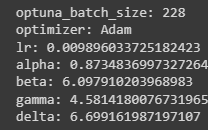

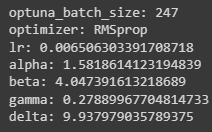![image.png](
  
)

In [655]:
optuna.visualization.plot_parallel_coordinate(study)

In [656]:
optuna.visualization.plot_param_importances(study)

In [657]:
optuna.visualization.plot_optimization_history(study)

In [658]:
optuna.visualization.plot_slice(study,params=['lr'])

In [659]:
optuna.visualization.plot_intermediate_values(study)

[W 2023-02-27 03:14:13,610] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [660]:
# #Model and Optmimizer
# model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)

# print(model)

In [661]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss


In [662]:
class MagneticLoss(torch.nn.Module):
  def __init__(self, num_classes, strength, width):
      super().__init__()
      self.num_classes = num_classes
      self.strength = strength
      self.width = width     

  def forward(self, z, y):
    N = z.shape[0] # number of samples
    K = self.num_classes # number of classes
    mu = torch.stack([z[y.squeeze==k].mean(dim=0) for k in range(K)], dim=0) # mean of each class
    print(f"mu: {mu}")
    z_center = z[None, :, :] - mu[:, None, :] # centered z
    print(f"z_center: {z_center}")
    z_Norm = z_center.norm(dim=2) # L2 norm of z_Center
    print(f"z_Norm: {z_Norm}")
    exp_term = torch.exp(-self.width * z_Norm)
    pairwise_sum = (exp_term[:, :, None] * exp_term[None, :, :]).sum() - exp_term.sum()
    loss = 0.5 * self.strength * pairwise_sum / N / (K - 1)
    return loss

In [663]:
# Loss Functions
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()
triplet_loss_fn = nn.TripletMarginLoss(margin=1.0)
#triplet_loss_fn = TripletLoss(margin=1.0)

contrastive_loss_fn = ContrastiveLoss(margin=1)
magnetic_loss_fn = MagneticLoss(num_classes=num_classes, strength=1, width=1)

---
Train and Validation loop

In [664]:
train_losses=[]
train_accuracy = []
accuracy_log = []
val_losses=[]
val_accuracy=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())

from tensorboardX import SummaryWriter

# Create a SummaryWriter object
writer = SummaryWriter() 



for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0
  

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Compute the contrastive loss #############################################################################
    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    # Compute the triplet loss #########################
    # Select a random sample as the anchor, then select the positive samples (samples with the same label as the anchor)
    # and negative samples (samples with a different label than the anchor) from the mu
    batch_size = mu.size(0)
    # Select a random sample as the anchor
    anchor_index = torch.randint(0, batch_size, (1,))
    anchor_embeddings = mu[anchor_index].view(1, -1) # Take the embedding for the current sample
    anchor_embeddings = anchor_embeddings.expand(batch_size,-1)
    # Select a fixed number of positive samples
    positive_indices = torch.randint(0, batch_size, (batch_size,))
    positive_embeddings = mu[positive_indices].view(-1,latent_dim)
    # Select a fixed number of negative samples
    negative_indices = torch.randint(0, batch_size, (batch_size,))
    negative_embeddings = mu[negative_indices].view(-1,latent_dim)
    #print(f"anchor_embeddings shape: {anchor_embeddings.shape}, positive_embeddings shape: {positive_embeddings.shape}, negative_embeddings shape: {negative_embeddings.shape}")
    triplet_loss = triplet_loss_fn(anchor_embeddings, positive_embeddings, negative_embeddings)
   
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + delta*contrastive_loss #+ epsilon*triplet_loss

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log for latent space visualziation (gif)...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

   # Write the scalar values to TensorBoard
    writer.add_scalar('loss/total', loss.item(), i)
    writer.add_scalar('loss/reconstruction', reconstruction_loss.item(), i)
    writer.add_scalar('loss/kld', kld_loss.item(), i)
    writer.add_scalar('loss/classification', classification_loss.item(), i)

  writer.add_embedding(z_reparmeterized, metadata=labels, global_step=epoch)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      # Compute the contrastive loss
      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Triplet loss: {triplet_loss:.3f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Close the SummaryWriter
writer.close()

Epoch: 1 / 10 | Reconst_loss: 251.680 | Kldiv loss: 53.423 | Classifcation loss: 2.001 | Constrast loss: 2.03 | Triplet loss: 1.124 | Total loss: 5098.313 | Train acc: 68.323 % ||| Val Loss: 5239.020 | Val acc: 68.341 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 424.265 | Kldiv loss: 66.792 | Classifcation loss: 2.221 | Constrast loss: 0.50 | Triplet loss: 1.938 | Total loss: 5103.054 | Train acc: 68.259 % ||| Val Loss: 5230.607 | Val acc: 68.498 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | Reconst_loss: 284.916 | Kldiv loss: 67.038 | Classifcation loss: 2.072 | Constrast loss: 0.00 | Triplet loss: 1.728 | Total loss: 5103.499 | Train acc: 68.279 % ||| Val Loss: 5205.

In [665]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

---
Model Evaluations

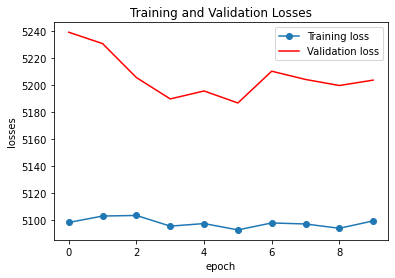

In [666]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

---
Latent Space Visualization

Latent Space Visualization
Latent Space Image 1 stored.
Latent Space Image 2 stored.
Latent Space Image 3 stored.
Latent Space Image 4 stored.
Latent Space Image 5 stored.
Latent Space Image 6 stored.
Latent Space Image 7 stored.
Latent Space Image 8 stored.
Latent Space Image 9 stored.
Latent Space Image 10 stored.

Latent Space Gif being created...



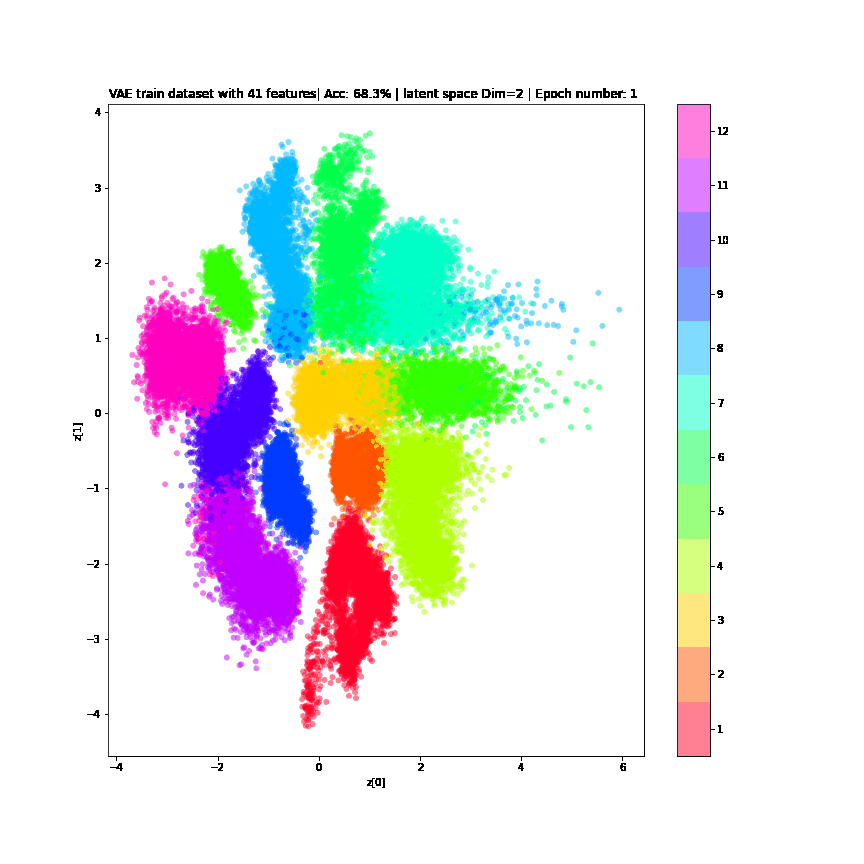

In [667]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(12,12))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('gist_rainbow', num_classes))
  cb = plt.colorbar(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],values=[1,2,3,4,5,6,7,8,9,10,11,12])
  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  cb.ax.tick_params(labelsize=10)
  # plt.xlim(-5, 5)
  # plt.ylim(-5, 5)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with {input_dim} features| Acc: {train_acc*100:.1f}% | latent space Dim={latent_dim} | Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")
print()
print("Latent Space Gif being created...")
print()

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave(f"/content/Latent_Space_and_Number_Features_{input_dim}.gif",gif)

from IPython.display import Image

fname = f'/content/Latent_Space_and_Number_Features_{input_dim}.gif'
Image(open(fname, 'rb').read())  # local

In [668]:
%tensorboard --logdir=runs

UsageError: Line magic function `%tensorboard` not found.


---
Test
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")
print()

class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 70
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.005
alpha = 1
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

train_losses=[]
train_accuracy = []
val_losses=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad()

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    loss = (alpha*reconstruction_loss + kld_loss*beta) + classification_loss

    # correct = torch.eq(classified.argmax(dim=1), labels).float()
    # classifcaiton_accuracy = correct.mean()

    # Calculate classification accuracy
    _, predicted = torch.max(classified, 1)
    correct = (predicted == labels.flatten()).sum().item()
    classifcaiton_accuracy = correct / len(predicted)



    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log ...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_classified = v_classified.view(-1, 13)
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      vloss = (alpha*reconstruction_loss + kld_loss*beta) + v_classification_loss

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)


  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | classifcation loss: {classification_loss:.5f} | total loss: {train_loss:.3f} | train acc: {classifcaiton_accuracy:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>

(85969, 19) <class 'numpy.ndarray'> (85969, 1) <class 'numpy.ndarray'>

X_train size: 51581 | X_val size: 17194 | X_test size: 17194
y_train size: 51581 | y_val size: 17194 | y_test size: 17194

Training Feature Split: (51581, 19) | Training Labels (51581, 1)
Validation Feature Split: (17194, 19) | Validation Labels (17194, 1)
Testing Feature Split: (17194, 19) | Testing Labels (17194, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([51581, 19]) , torch.Size([51581, 1])
Validation: torch.Size([17194, 19]) , torch.Size([17194, 1])
Testing:  torch.Size([17194, 19]) , torch.Size([17194, 1])

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): 

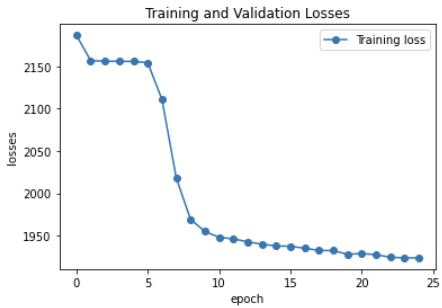